## 数据处理


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import os
os.chdir('/content/drive/MyDrive/美赛/2025_MCM-ICM_Problems/2025_Problem_C_Data')

In [ ]:
athletes = pd.read_csv('summerOly_athletes.csv')
hosts = pd.read_csv('summerOly_hosts.csv')
medal_counts = pd.read_csv('summerOly_medal_counts.csv')
programs = pd.read_csv('summerOly_programs.csv')

In [ ]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    252565 non-null  object
 1   Sex     252565 non-null  object
 2   Team    252565 non-null  object
 3   NOC     252565 non-null  object
 4   Year    252565 non-null  int64 
 5   City    252565 non-null  object
 6   Sport   252565 non-null  object
 7   Event   252565 non-null  object
 8   Medal   252565 non-null  object
dtypes: int64(1), object(8)
memory usage: 17.3+ MB


参赛选手性别比例

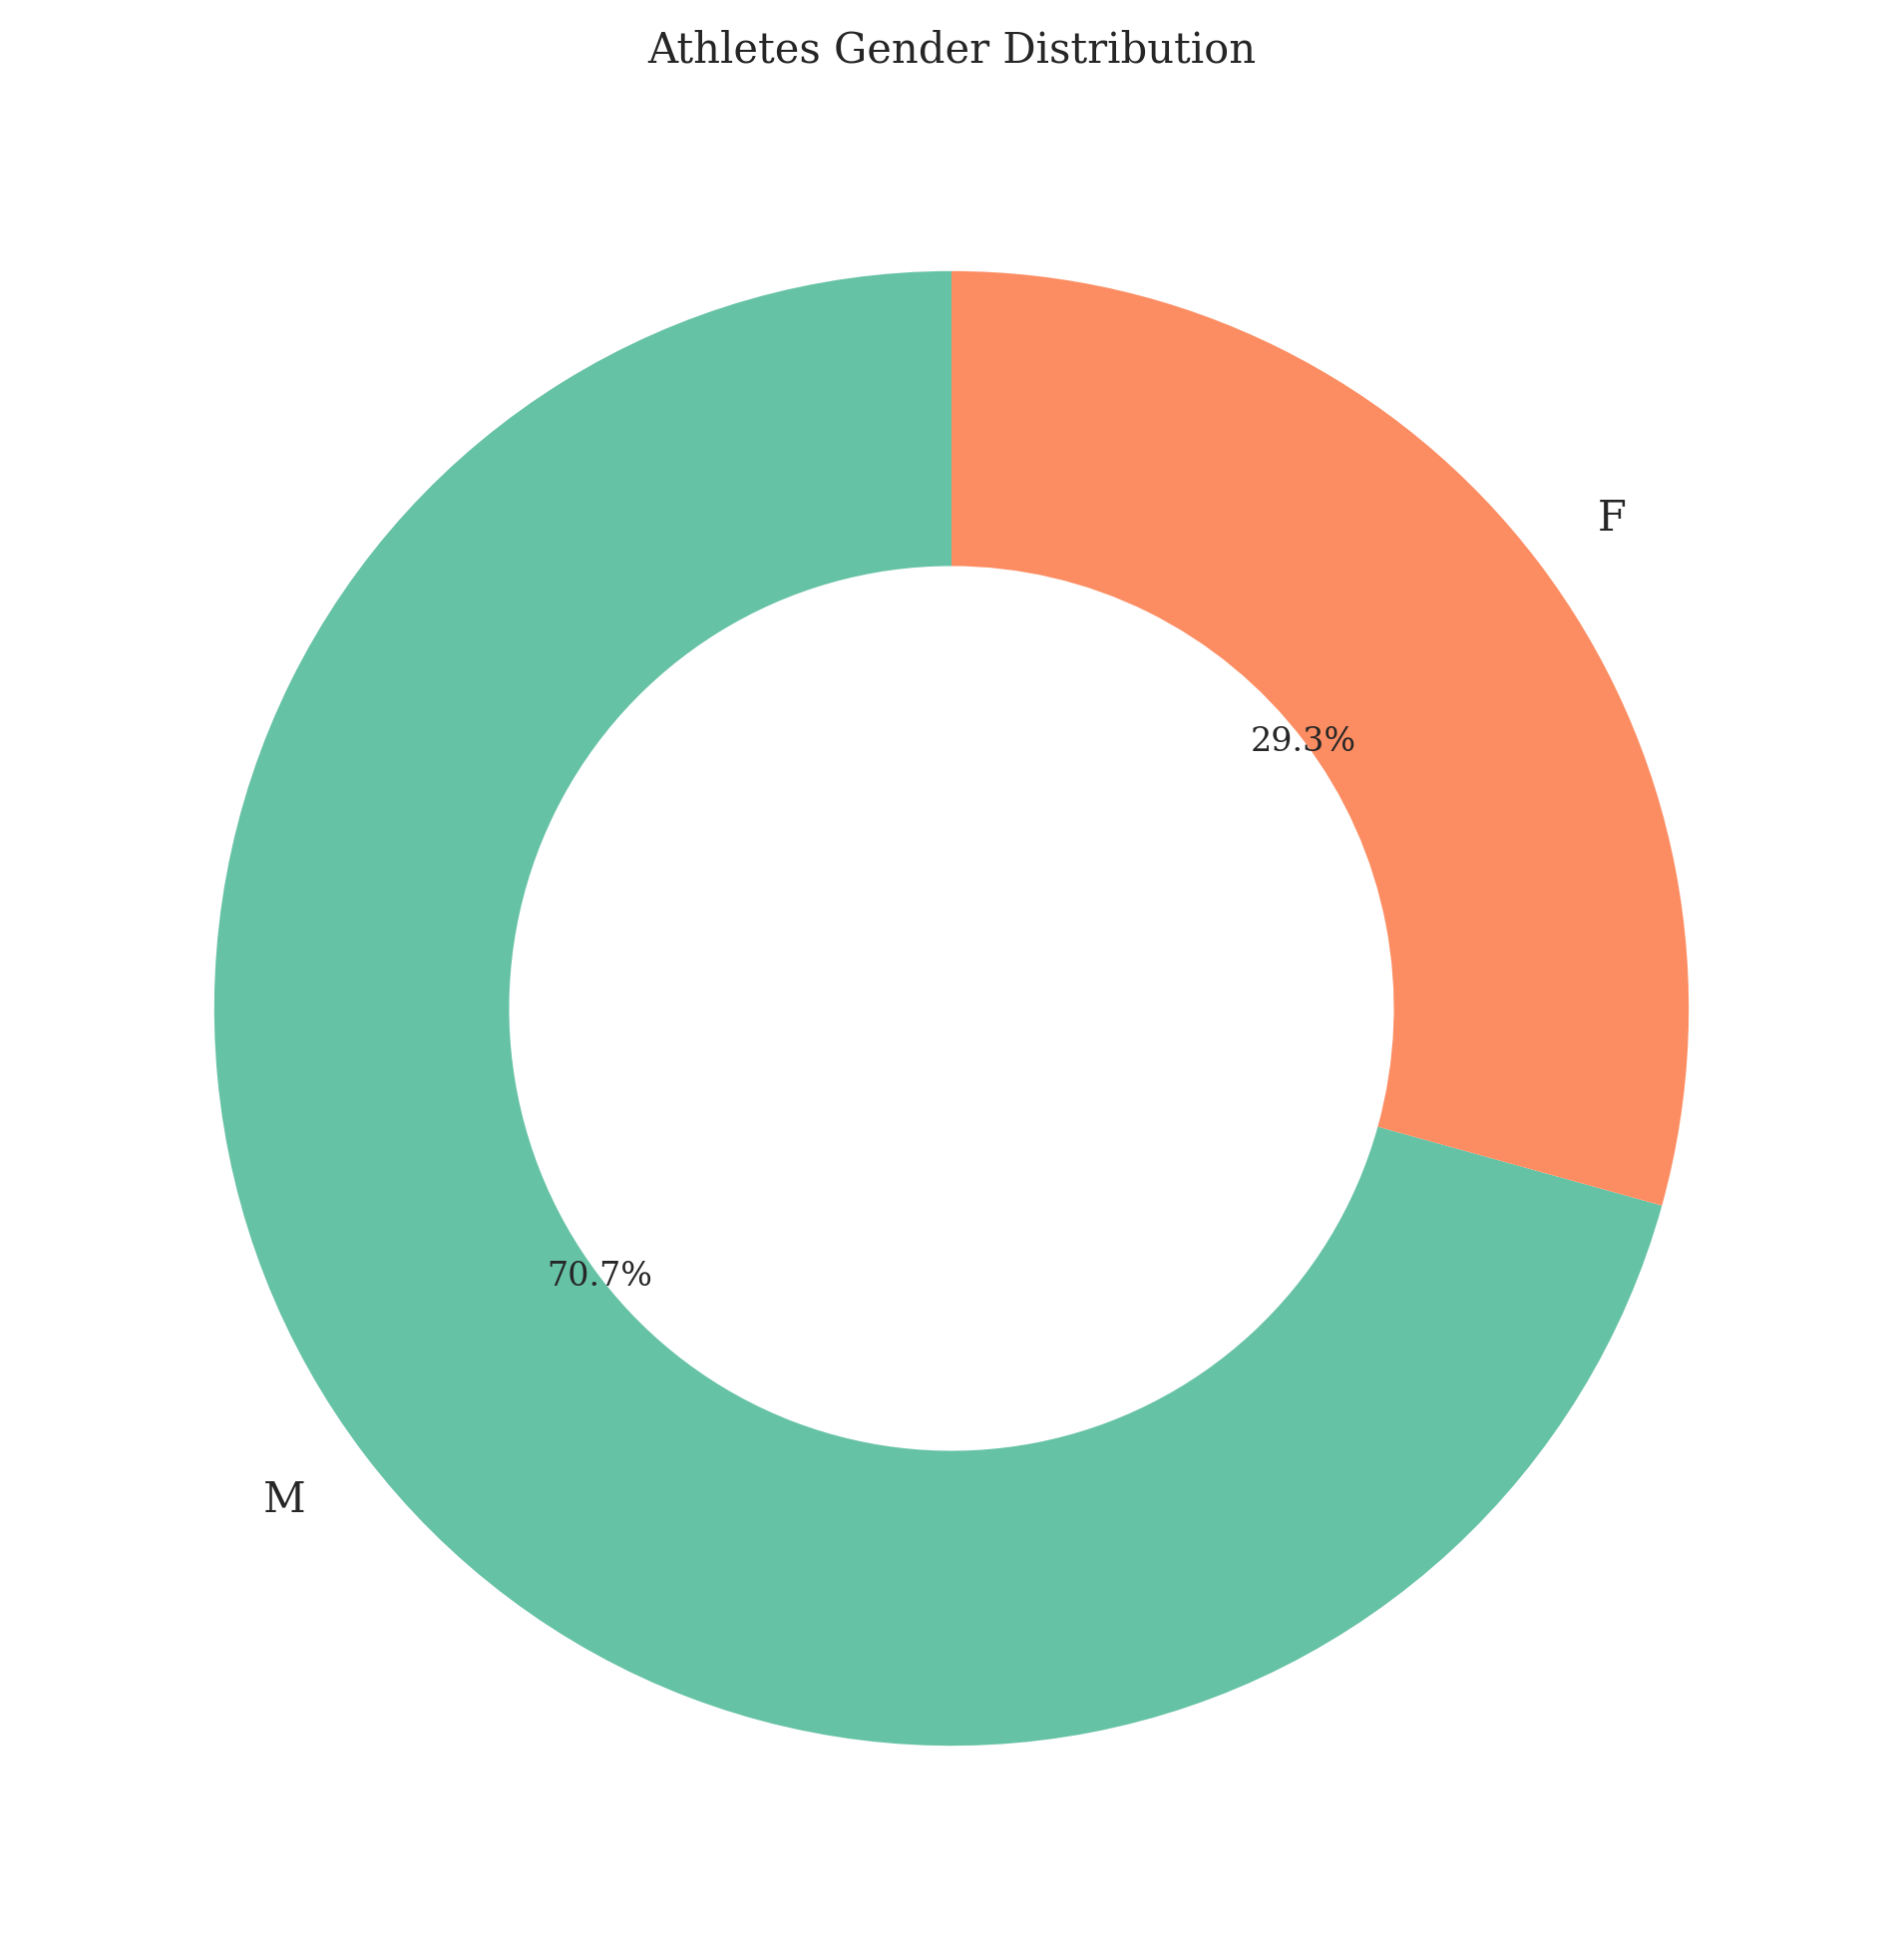

In [ ]:
gender_counts = athletes['Sex'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_counts,
        labels=gender_counts.index,
        colors=['#66c2a5', '#fc8d62'],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'width':0.4})
plt.title("Athletes Gender Distribution")
plt.savefig('Athletes Gender Distribution.png', dpi=300)
plt.show()

国家和奖牌类型统计

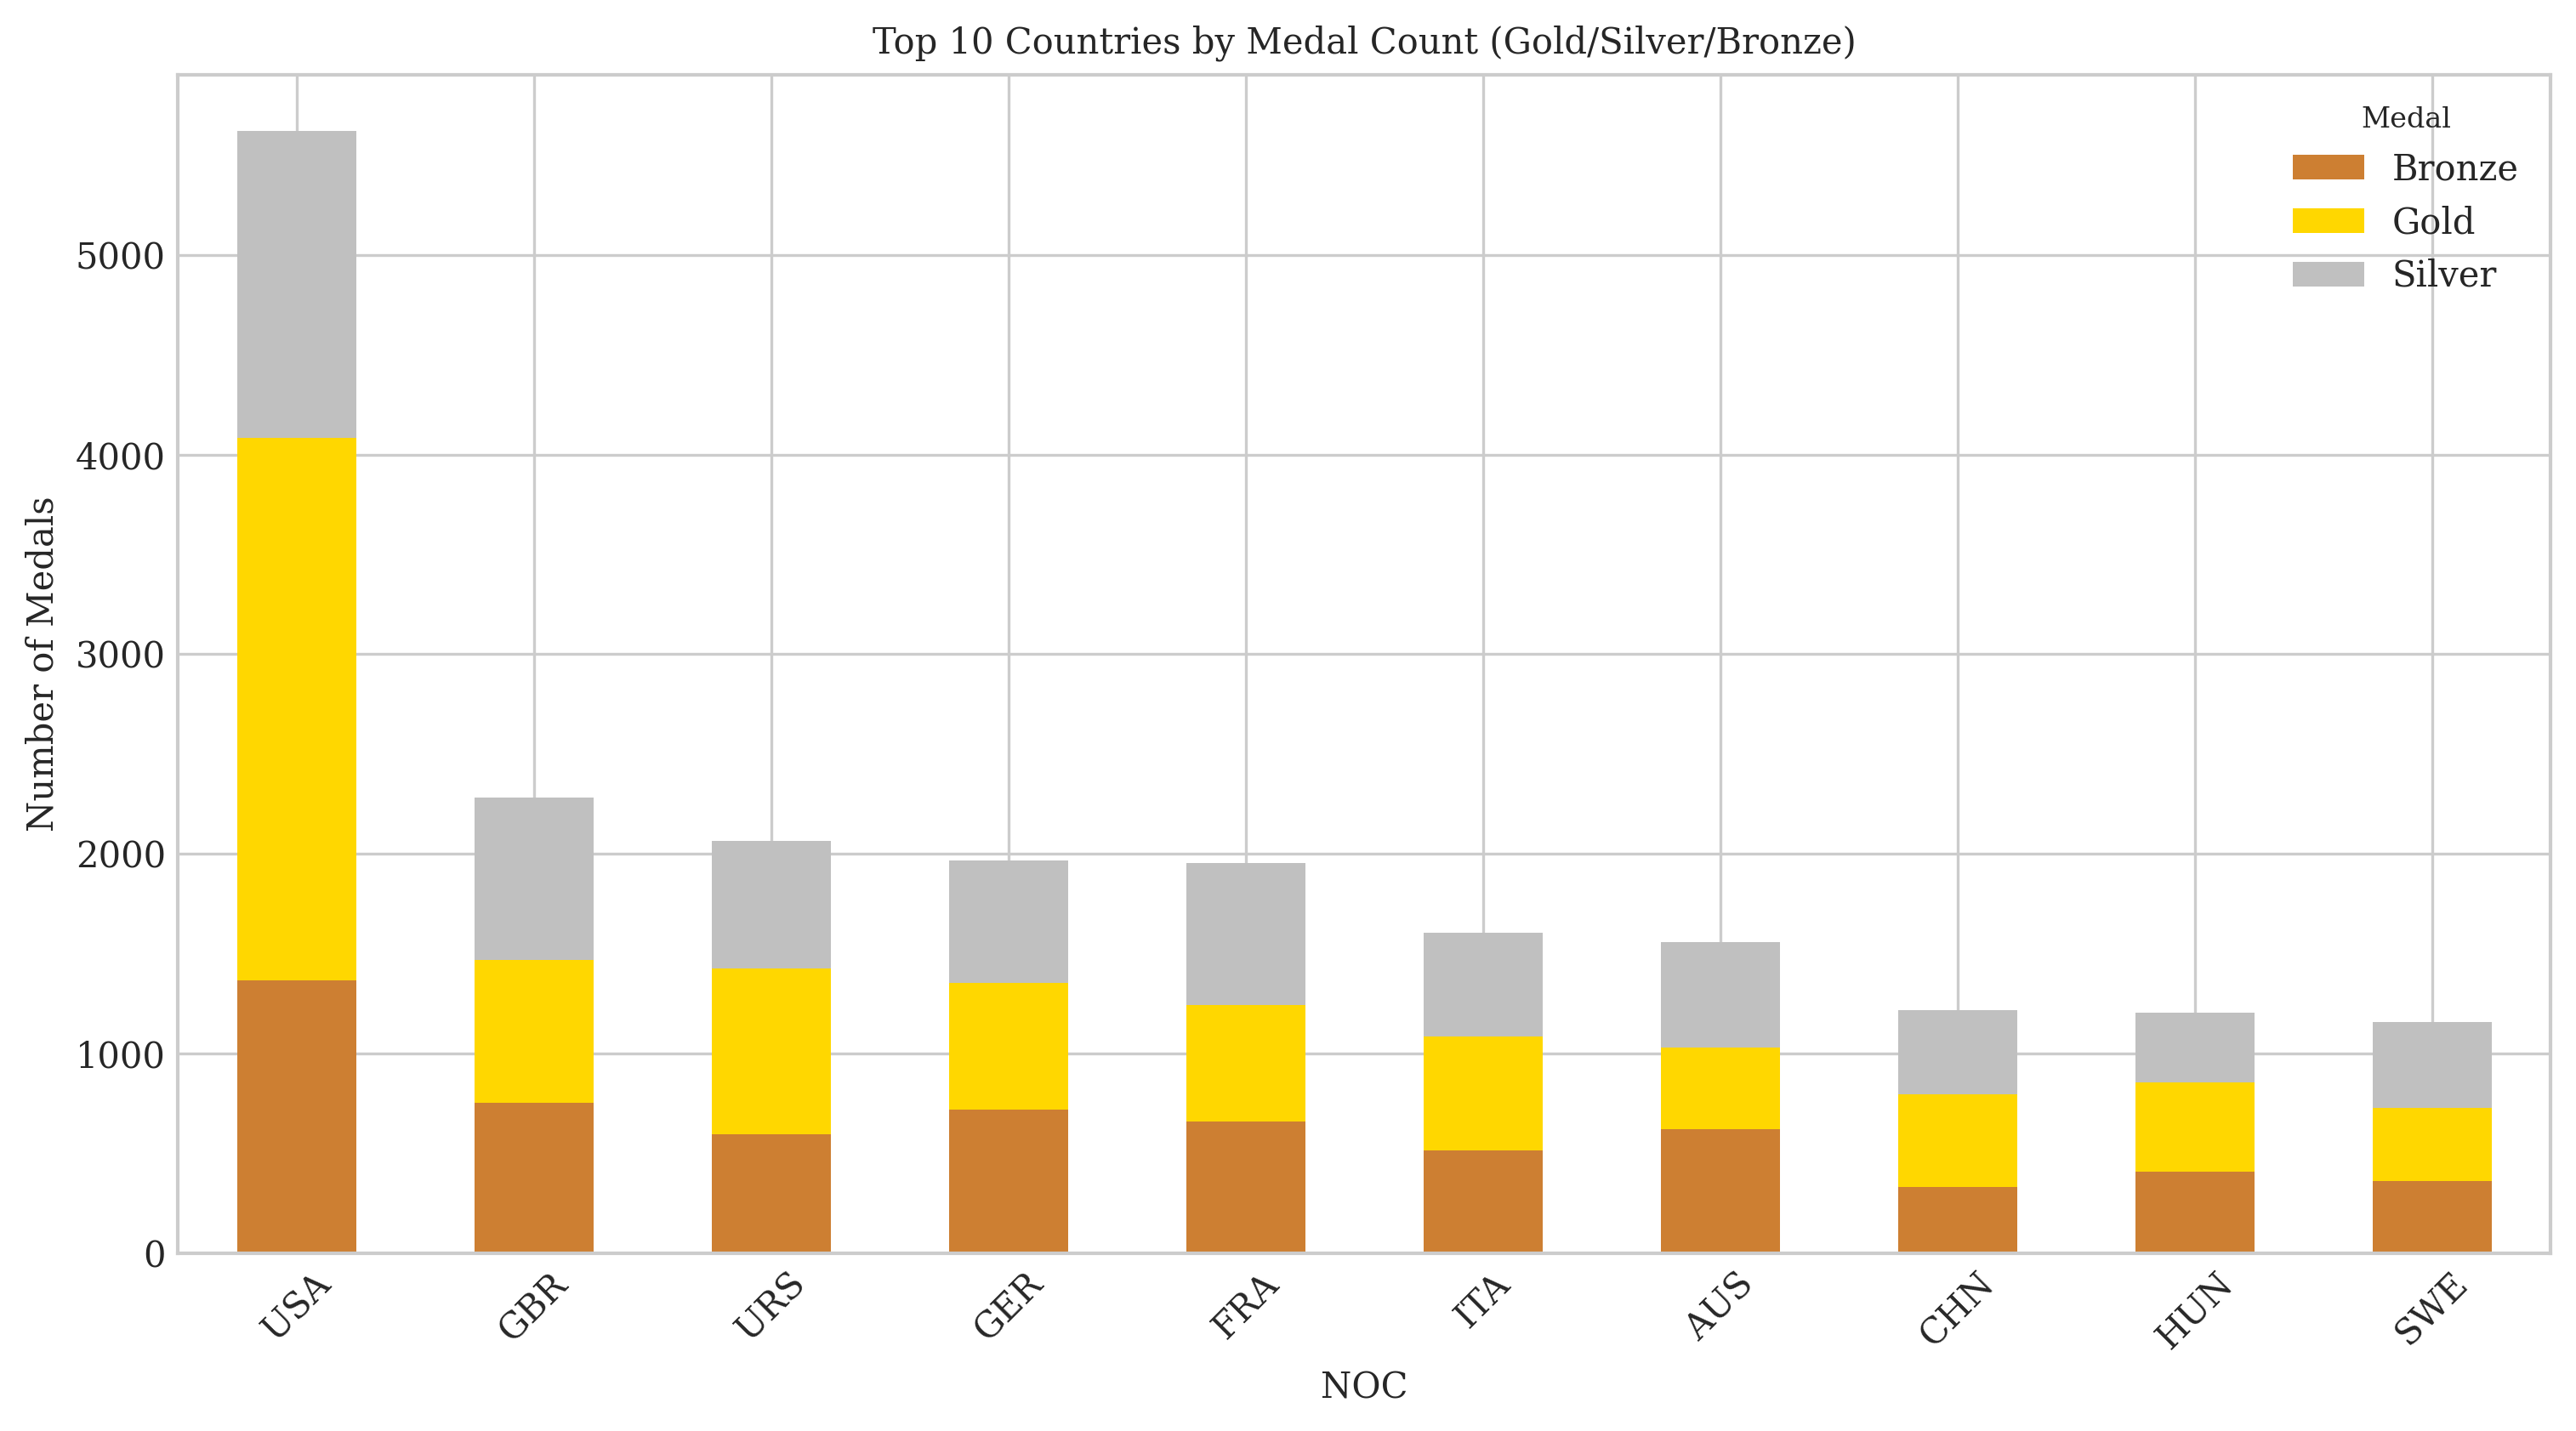

In [ ]:
# 过滤有奖牌的数据
medal_data = athletes[athletes['Medal'] != 'No medal']

# 按国家和奖牌类型统计
medal_counts = pd.crosstab(medal_data['NOC'], medal_data['Medal'])

# 取奖牌数前10国家
top_countries = medal_counts.sum(axis=1).nlargest(10).index
medal_counts.loc[top_countries].plot(kind='bar', stacked=True,
                                    color=['#CD7F32', '#FFD700', '#C0C0C0'],
                                    figsize=(12,6))
plt.title("Top 10 Countries by Medal Count (Gold/Silver/Bronze)")
plt.xlabel("NOC")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.savefig('Top10_Countries_by_Medal_Count.png', dpi=300)
plt.show()

参赛选手人数变化趋势

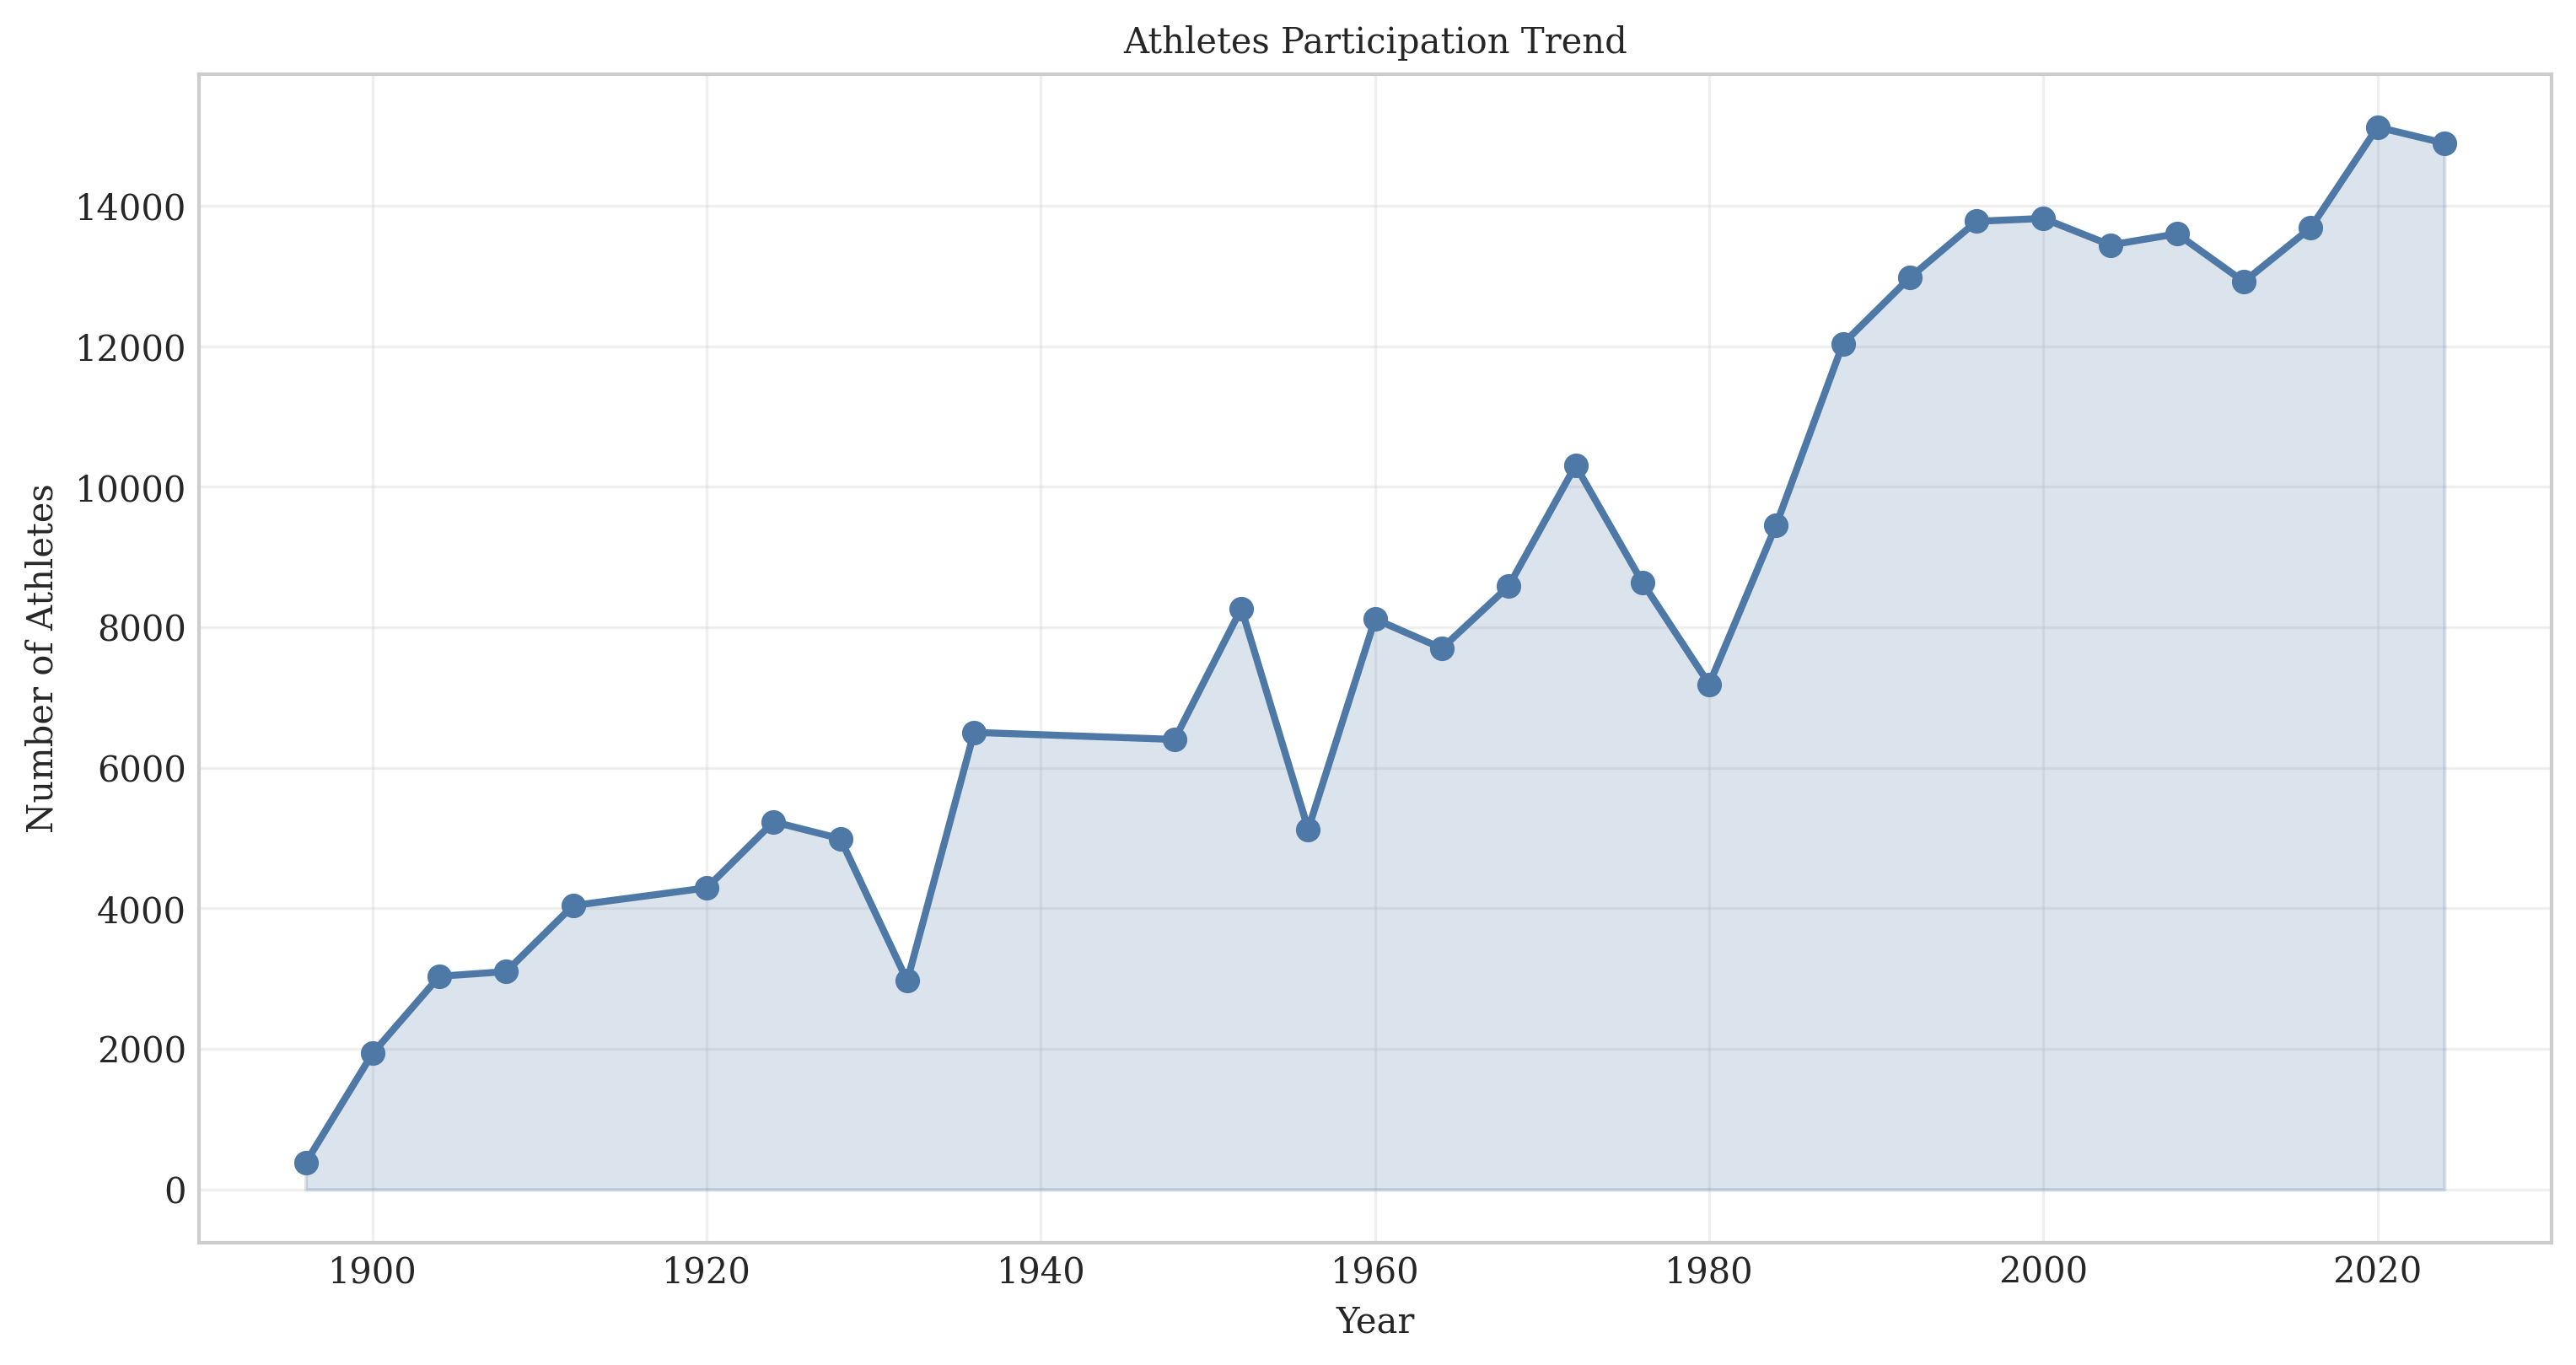

In [ ]:
# 按十年分组统计
athletes['Four Year'] = (athletes['Year'] // 4) * 4
decade_counts = athletes.groupby('Four Year').size()

plt.figure(figsize=(12,6))
plt.plot(decade_counts.index, decade_counts.values,
        marker='o',
        color='#4e79a7',
        linewidth=2)
plt.fill_between(decade_counts.index,
                decade_counts.values,
                color='#4e79a7',
                alpha=0.2)
plt.title("Athletes Participation Trend")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.grid(alpha=0.3)
plt.savefig('Athletes_Participation_Trend.png', dpi=300)
plt.show()

参与比赛人数最多的前十五个Sport

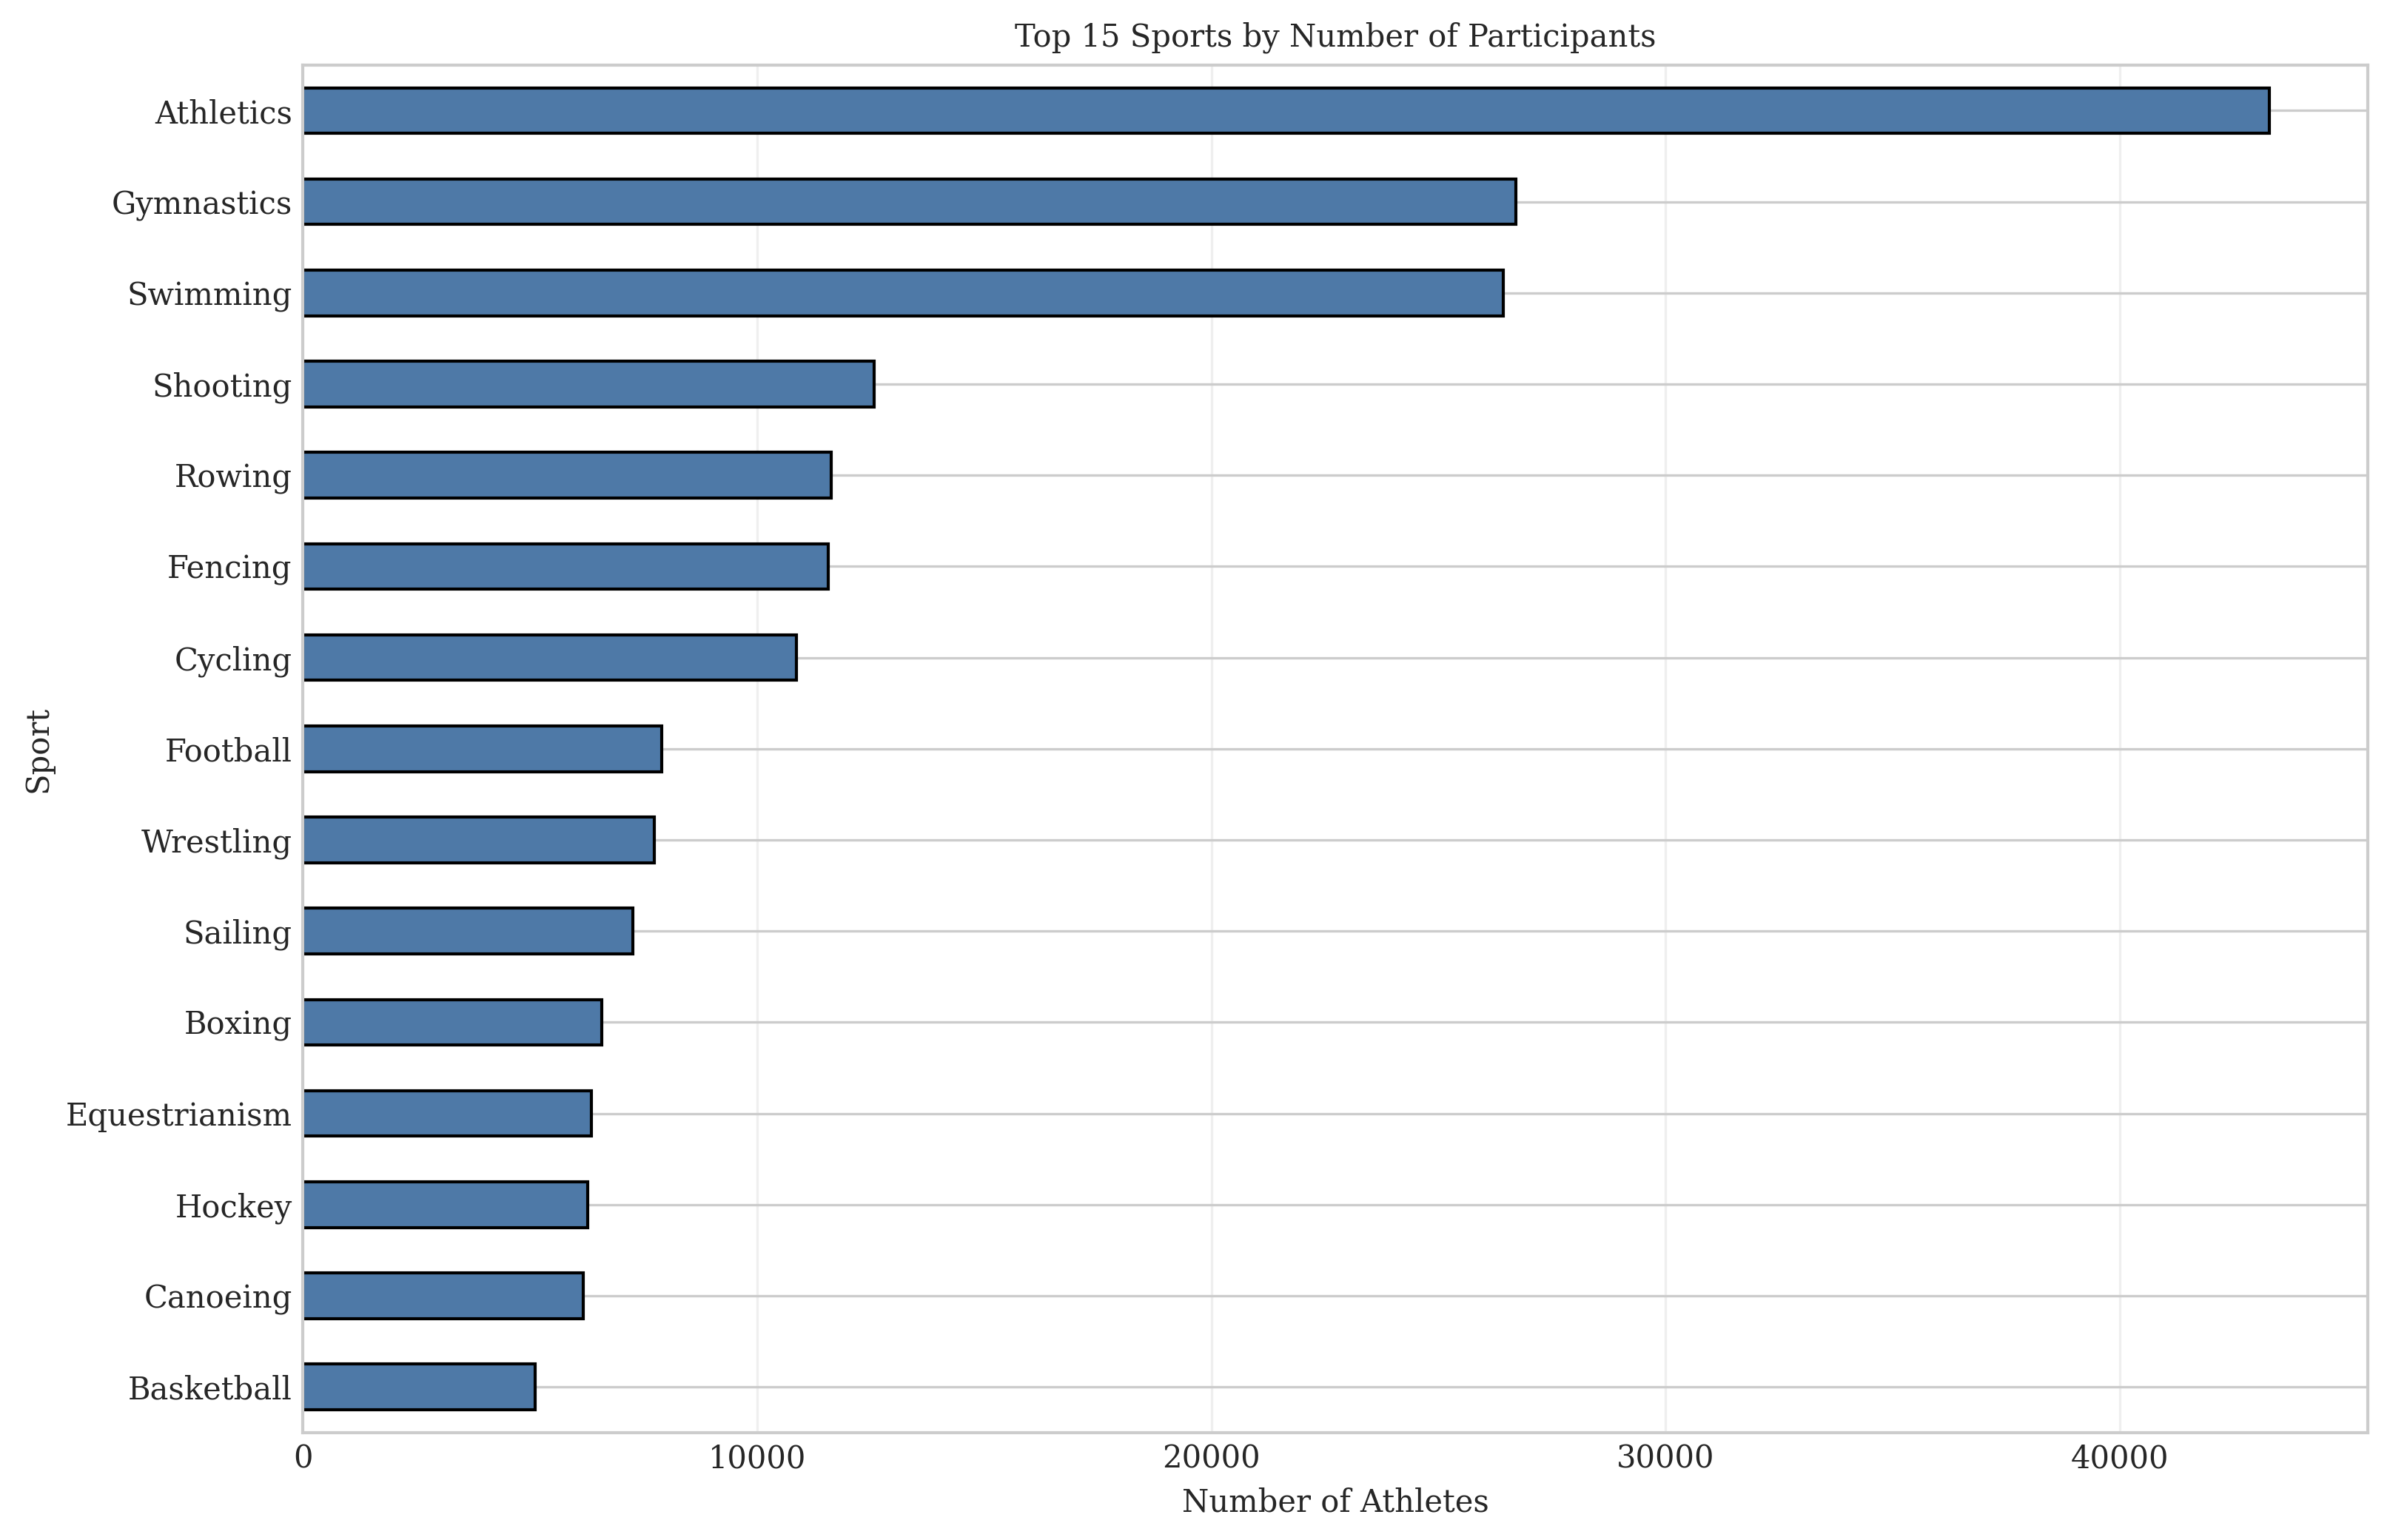

In [ ]:
sport_counts = athletes['Sport'].value_counts().nlargest(15)

plt.figure(figsize=(12,8))
sport_counts.sort_values().plot(kind='barh',
                               color='#4e79a7',
                               edgecolor='black')
plt.title("Top 15 Sports by Number of Participants")
plt.xlabel("Number of Athletes")
plt.ylabel("Sport")
plt.grid(axis='x', alpha=0.3)
plt.savefig('Top15_Sports_by_Number_of_Participants.png', dpi=300)
plt.show()

运动员国家分布

In [ ]:
import plotly.express as px

country_counts = athletes['NOC'].value_counts().reset_index()
country_counts.columns = ['NOC', 'Athletes']

fig = px.choropleth(country_counts,
                   locations="NOC",
                   color="Athletes",
                   hover_name="NOC",
                   projection="natural earth",
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(title="Global Distribution of Athletes")

fig.show()

In [ ]:
medal_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    1435 non-null   int64 
 1   NOC     1435 non-null   object
 2   Gold    1435 non-null   int64 
 3   Silver  1435 non-null   int64 
 4   Bronze  1435 non-null   int64 
 5   Total   1435 non-null   int64 
 6   Year    1435 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 78.6+ KB


In [ ]:
medal_counts['NOC'] = medal_counts['NOC'].str.strip()
print(len(medal_counts['NOC'].unique()))
print(medal_counts['NOC'].unique())

164
['United States' 'Greece' 'Germany' 'France' 'Great Britain' 'Hungary'
 'Austria' 'Australia' 'Denmark' 'Switzerland' 'Mixed team' 'Belgium'
 'Italy' 'Cuba' 'Canada' 'Spain' 'Luxembourg' 'Norway' 'Netherlands'
 'India' 'Bohemia' 'Sweden' 'Australasia' 'Russian Empire' 'Finland'
 'South Africa' 'Estonia' 'Brazil' 'Japan' 'Czechoslovakia' 'New Zealand'
 'Yugoslavia' 'Argentina' 'Uruguay' 'Poland' 'Haiti' 'Portugal' 'Romania'
 'Egypt' 'Ireland' 'Chile' 'Philippines' 'Mexico' 'Latvia' 'Turkey'
 'Jamaica' 'Peru' 'Ceylon' 'Trinidad and Tobago' 'Panama' 'South Korea'
 'Iran' 'Puerto Rico' 'Soviet Union' 'Lebanon' 'Bulgaria' 'Venezuela'
 'United Team of Germany' 'Iceland' 'Pakistan' 'Bahamas' 'Ethiopia'
 'Formosa' 'Ghana' 'Morocco' 'Singapore' 'British West Indies' 'Iraq'
 'Tunisia' 'Kenya' 'Nigeria' 'East Germany' 'West Germany' 'Mongolia'
 'Uganda' 'Cameroon' 'Taiwan' 'North Korea' 'Colombia' 'Niger' 'Bermuda'
 'Thailand' 'Zimbabwe' 'Tanzania' 'Guyana' 'China' 'Ivory Coast' 'Syria'
 'Alg

In [ ]:
noc_dict = {
    "Afghanistan": "AFG",
    "Albania": "ALB",
    "Algeria": "ALG",
    "Andorra": "AND",
    "Angola": "ANG",
    "Antigua and Barbuda": "ANT",
    "Argentina": "ARG",
    "Armenia": "ARM",
    "Aruba": "ARU",
    "American Samoa": "ASA",
    "Australia": "AUS",
    "Austria": "AUT",
    "Azerbaijan": "AZE",
    "Bahamas": "BAH",
    "Bangladesh": "BAN",
    "Barbados": "BAR",
    "Burundi": "BDI",
    "Belgium": "BEL",
    "Benin": "BEN",
    "Bermuda": "BER",
    "Bhutan": "BHU",
    "Bosnia and Herzegovina": "BIH",
    "Belize": "BIZ",
    "Belarus": "BLR",
    "Bolivia": "BOL",
    "Botswana": "BOT",
    "Brazil": "BRA",
    "Bahrain": "BRN",
    "Brunei": "BRU",
    "Bulgaria": "BUL",
    "Burkina Faso": "BUR",
    "Central African Republic": "CAF",
    "Cambodia": "CAM",
    "Canada": "CAN",
    "Cayman Islands": "CAY",
    "Republic of the Congo": "CGO",
    "Chad": "CHA",
    "Chile": "CHI",
    "China": "CHN",
    "Ivory Coast": "CIV",
    "Cameroon": "CMR",
    "Democratic Republic of the Congo": "COD",
    "Cook Islands": "COK",
    "Colombia": "COL",
    "Comoros": "COM",
    "Cape Verde": "CPV",
    "Costa Rica": "CRC",
    "Croatia": "CRO",
    "Cuba": "CUB",
    "Cyprus": "CYP",
    "Czech Republic": "CZE",
    "Denmark": "DEN",
    "Djibouti": "DJI",
    "Dominica": "DMA",
    "Dominican Republic": "DOM",
    "Ecuador": "ECU",
    "Egypt": "EGY",
    "Eritrea": "ERI",
    "El Salvador": "ESA",
    "Spain": "ESP",
    "Estonia": "EST",
    "Ethiopia": "ETH",
    "Fiji": "FIJ",
    "Finland": "FIN",
    "France": "FRA",
    "Federated States of Micronesia": "FSM",
    "Gabon": "GAB",
    "The Gambia": "GAM",
    "Great Britain": "GBR",
    "Guinea-Bissau": "GBS",
    "Georgia": "GEO",
    "Equatorial Guinea": "GEQ",
    "Germany": "GER",
    "Ghana": "GHA",
    "Greece": "GRE",
    "Grenada": "GRN",
    "Guatemala": "GUA",
    "Guinea": "GUI",
    "Guam": "GUM",
    "Guyana": "GUY",
    "Haiti": "HAI",
    "Hong Kong": "HKG",
    "Honduras": "HON",
    "Hungary": "HUN",
    "Indonesia": "INA",
    "India": "IND",
    "Iran": "IRI",
    "Ireland": "IRL",
    "Iraq": "IRQ",
    "Iceland": "ISL",
    "Israel": "ISR",
    "Virgin Islands": "ISV",
    "Italy": "ITA",
    "British Virgin Islands": "IVB",
    "Jamaica": "JAM",
    "Jordan": "JOR",
    "Japan": "JPN",
    "Kazakhstan": "KAZ",
    "Kenya": "KEN",
    "Kyrgyzstan": "KGZ",
    "Kiribati": "KIR",
    "South Korea": "KOR",
    "Kosovo": "KOS",
    "Saudi Arabia": "KSA",
    "Kuwait": "KUW",
    "Laos": "LAO",
    "Latvia": "LAT",
    "Libya": "LBA",
    "Lebanon": "LBN",
    "Liberia": "LBR",
    "Saint Lucia": "LCA",
    "Lesotho": "LES",
    "Liechtenstein": "LIE",
    "Lithuania": "LTU",
    "Luxembourg": "LUX",
    "Madagascar": "MAD",
    "Morocco": "MAR",
    "Malaysia": "MAS",
    "Malawi": "MAW",
    "Moldova": "MDA",
    "Maldives": "MDV",
    "Mexico": "MEX",
    "Mongolia": "MGL",
    "Marshall Islands": "MHL",
    "North Macedonia": "MKD",
    "Mali": "MLI",
    "Malta": "MLT",
    "Montenegro": "MNE",
    "Monaco": "MON",
    "Mozambique": "MOZ",
    "Mauritius": "MRI",
    "Mauritania": "MTN",
    "Myanmar": "MYA",
    "Namibia": "NAM",
    "Nicaragua": "NCA",
    "Netherlands": "NED",
    "Nepal": "NEP",
    "Nigeria": "NGR",
    "Niger": "NIG",
    "Norway": "NOR",
    "Nauru": "NRU",
    "New Zealand": "NZL",
    "Oman": "OMA",
    "Pakistan": "PAK",
    "Panama": "PAN",
    "Paraguay": "PAR",
    "Peru": "PER",
    "Philippines": "PHI",
    "Palestine": "PLE",
    "Palau": "PLW",
    "Papua New Guinea": "PNG",
    "Poland": "POL",
    "Portugal": "POR",
    "North Korea": "PRK",
    "Puerto Rico": "PUR",
    "Qatar": "QAT",
    "Romania": "ROU",
    "South Africa": "RSA",
    "Russia": "RUS",
    "Rwanda": "RWA",
    "Samoa": "SAM",
    "Senegal": "SEN",
    "Seychelles": "SEY",
    "Singapore": "SGP",
    "Saint Kitts and Nevis": "SKN",
    "Sierra Leone": "SLE",
    "Slovenia": "SLO",
    "San Marino": "SMR",
    "Solomon Islands": "SOL",
    "Somalia": "SOM",
    "Serbia": "SRB",
    "Sri Lanka": "SRI",
    "South Sudan": "SSD",
    "São Tomé and Príncipe": "STP",
    "Sudan": "SUD",
    "Switzerland": "SUI",
    "Suriname": "SUR",
    "Slovakia": "SVK",
    "Sweden": "SWE",
    "Eswatini": "SWZ",
    "Syria": "SYR",
    "Tanzania": "TAN",
    "Tonga": "TGA",
    "Thailand": "THA",
    "Tajikistan": "TJK",
    "Turkmenistan": "TKM",
    "Timor-Leste": "TLS",
    "Togo": "TOG",
    "Chinese Taipei": "TPE",
    "Trinidad and Tobago": "TTO",
    "Tunisia": "TUN",
    "Turkey": "TUR",
    "Tuvalu": "TUV",
    "United Arab Emirates": "UAE",
    "Uganda": "UGA",
    "Ukraine": "UKR",
    "Uruguay": "URU",
    "United States": "USA",
    "Uzbekistan": "UZB",
    "Vanuatu": "VAN",
    "Venezuela": "VEN",
    "Vietnam": "VIE",
    "Saint Vincent and the Grenadines": "VIN",
    "Yemen": "YEM",
    "Zambia": "ZAM",
    "Zimbabwe": "ZIM"
}
medal_counts['NOC'] = medal_counts['NOC'].map(noc_dict).fillna(medal_counts['NOC'])
medal_counts.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,USA,11,7,2,20,1896
1,2,GRE,10,18,19,47,1896
2,3,GER,6,5,2,13,1896
3,4,FRA,5,4,2,11,1896
4,5,GBR,2,3,2,7,1896


In [ ]:
medal_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    1435 non-null   int64 
 1   NOC     1435 non-null   object
 2   Gold    1435 non-null   int64 
 3   Silver  1435 non-null   int64 
 4   Bronze  1435 non-null   int64 
 5   Total   1435 non-null   int64 
 6   Year    1435 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 78.6+ KB


给定国家奖牌榜排名变化

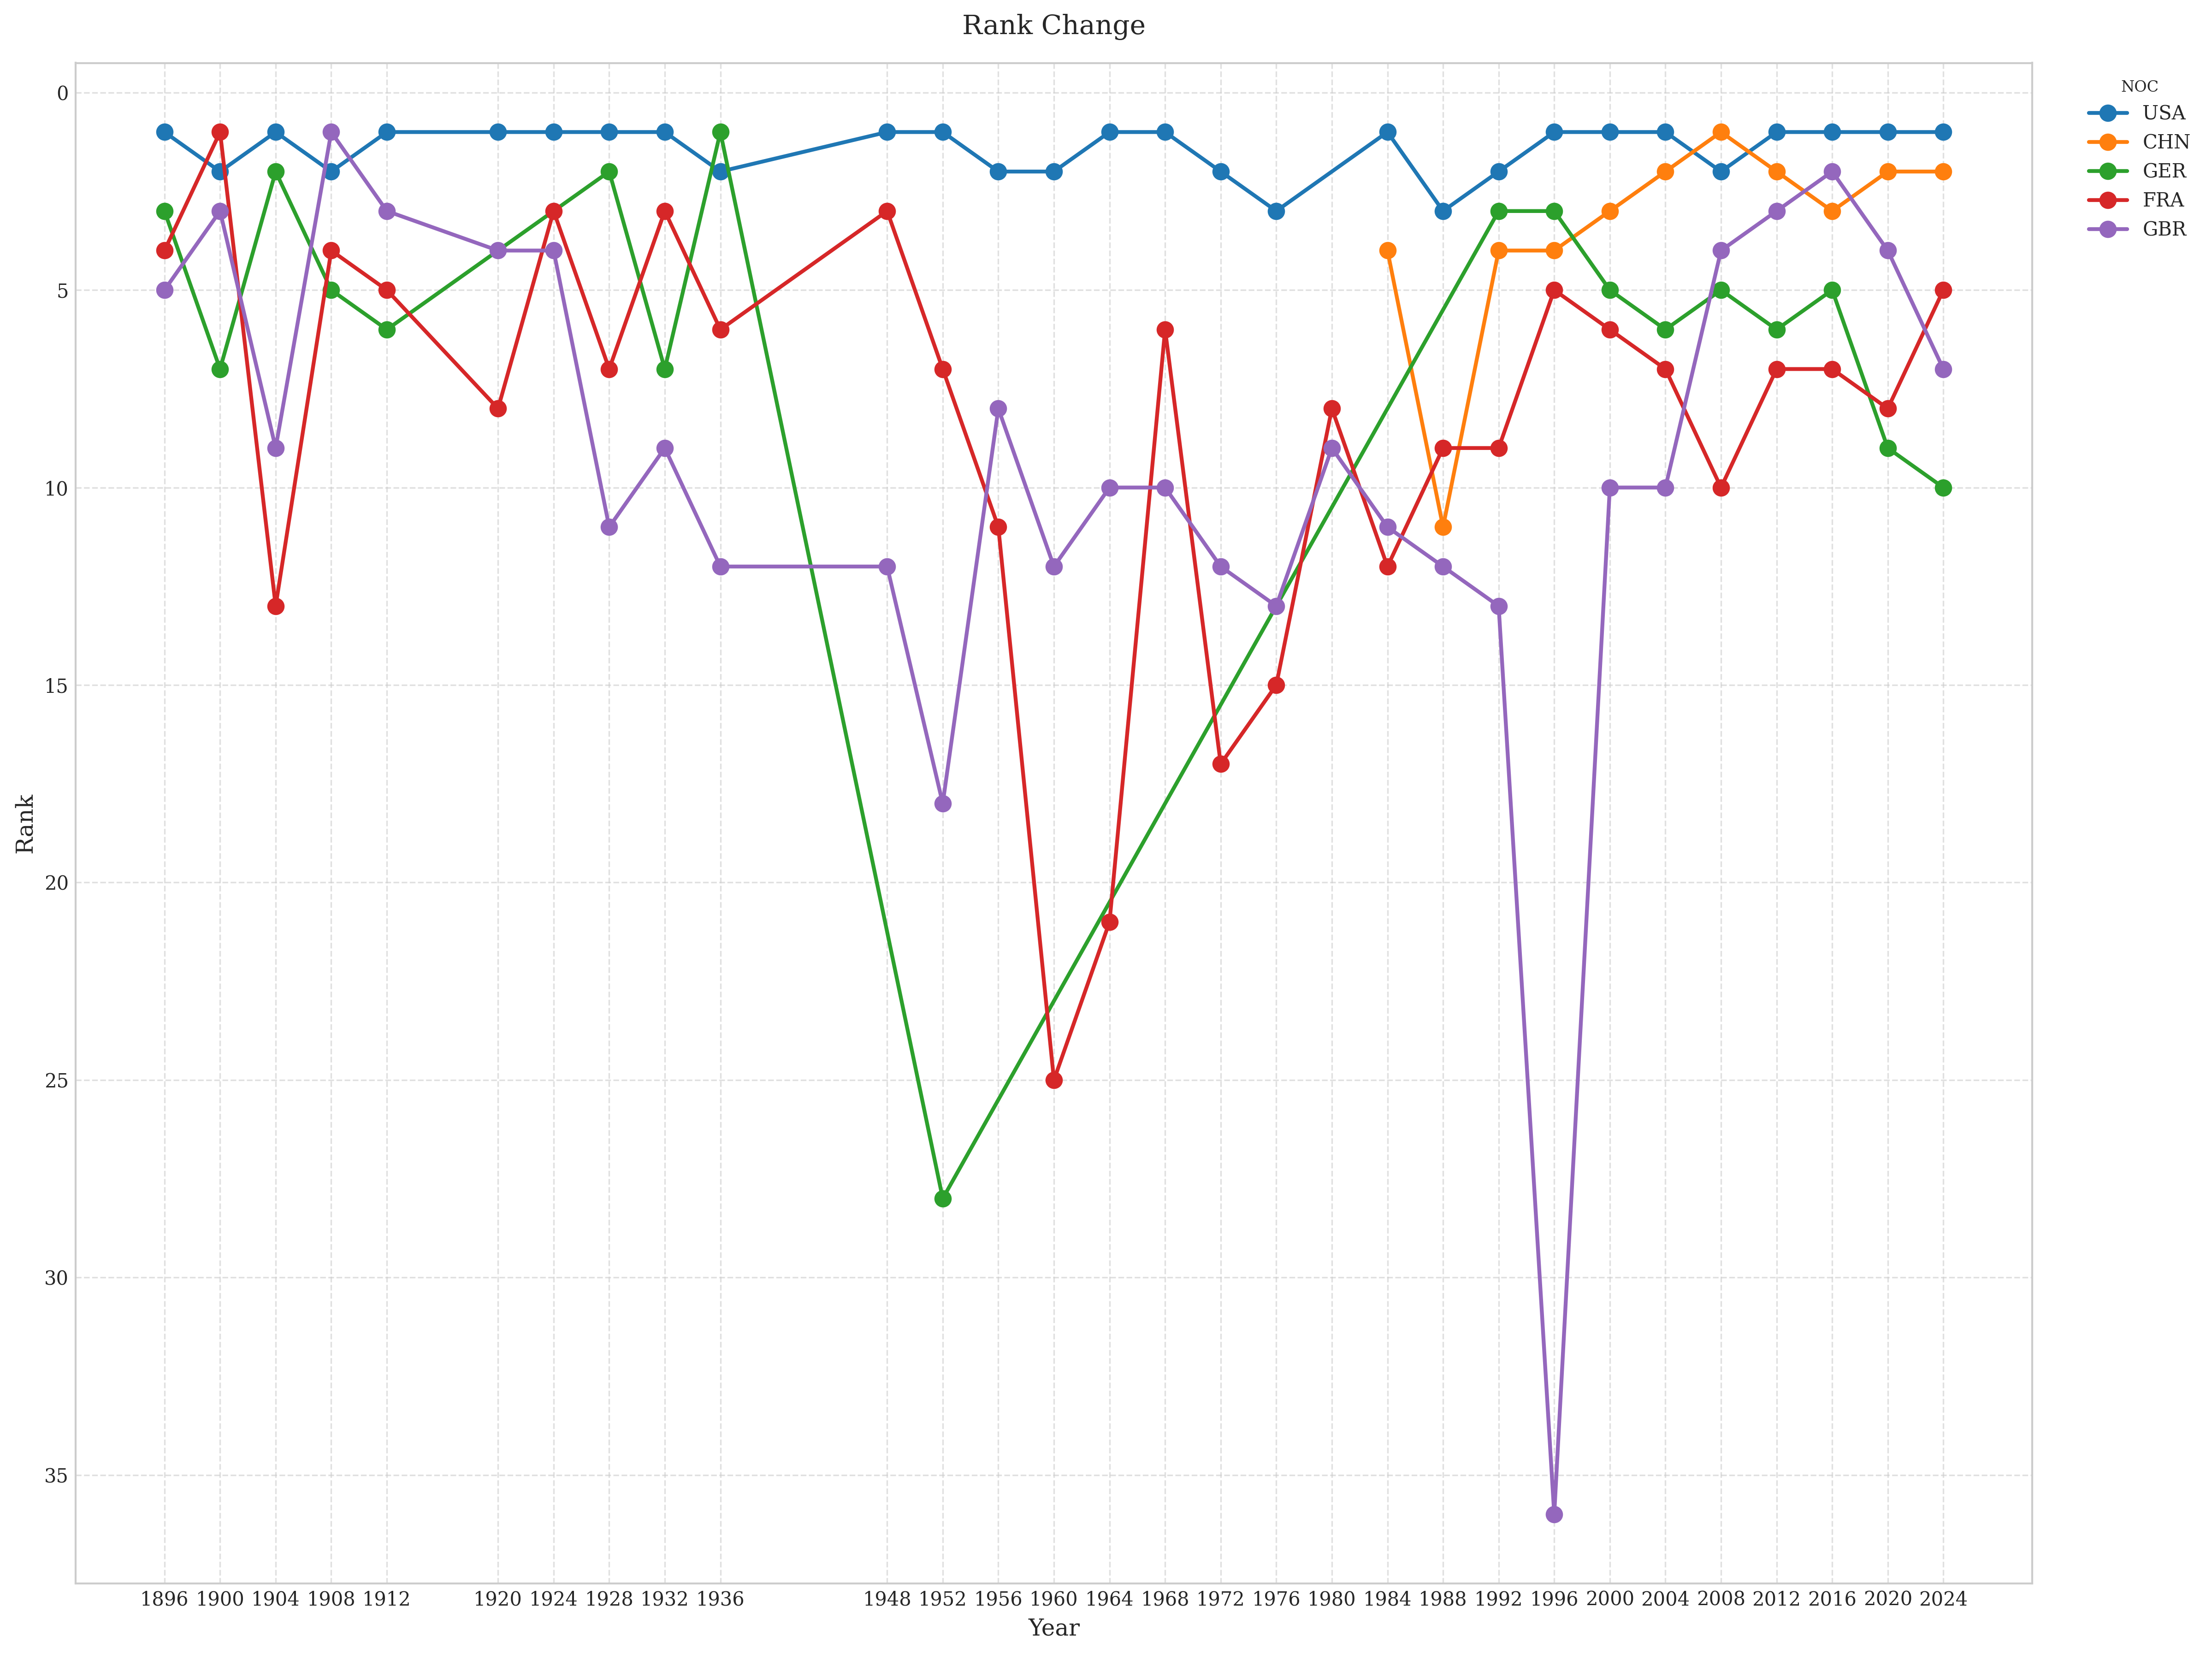

In [ ]:
# 筛选主要国家
top_nocs = ["USA", "CHN", "GER", "FRA", "GBR"]

# 创建画布
plt.figure(figsize=(16, 12), dpi=300)

# 绘制各国家线
for noc in top_nocs:
    country_data = medal_counts[medal_counts["NOC"] == noc]
    plt.plot(
        country_data["Year"],
        country_data["Rank"],
        marker="o",
        markersize=8,
        linewidth=2,
        label=noc
    )

# 倒置Y轴（数值越小排名越高）
plt.gca().invert_yaxis()

# 图表装饰
plt.title("Rank Change", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rank", fontsize=12)
plt.xticks(medal_counts["Year"].unique())
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="NOC", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.savefig("ranking_dynamics.pdf")
plt.show()

美国奖牌数量变化趋势

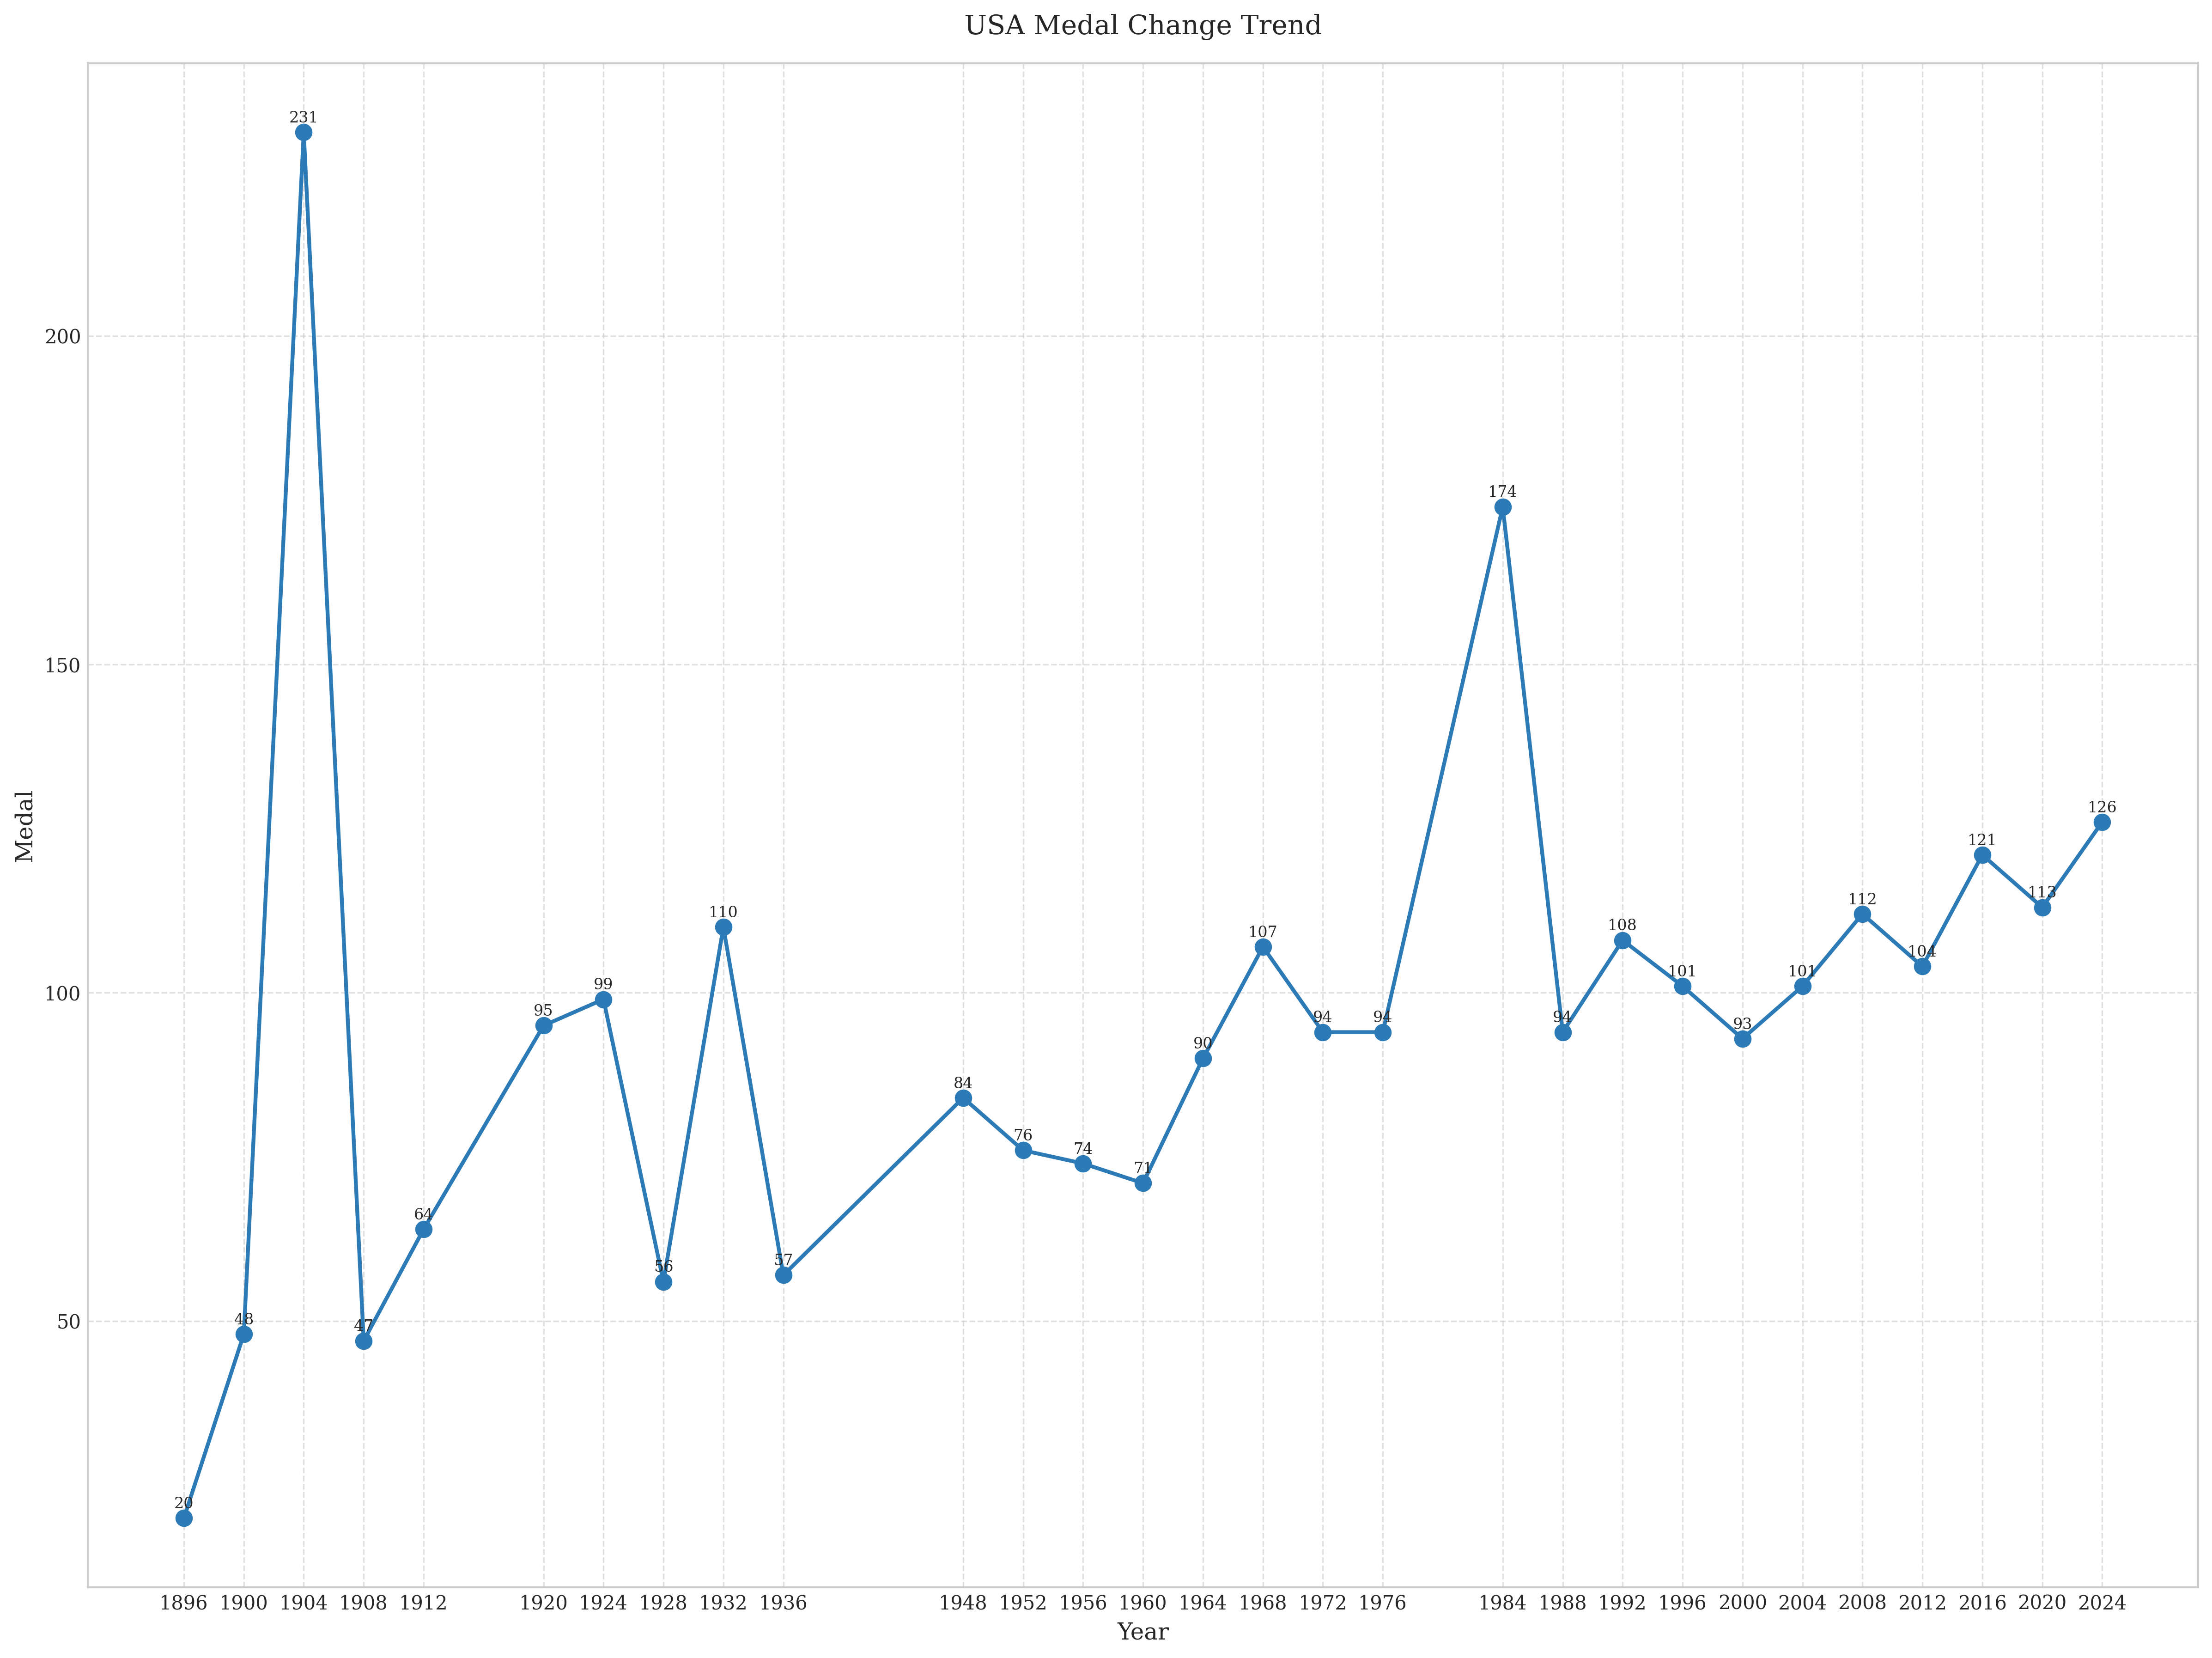

In [ ]:
# 选择目标国家
target_noc = "USA"

# 筛选数据
country_data = medal_counts[medal_counts["NOC"] == target_noc]

# 创建画布
plt.figure(figsize=(16, 12), dpi=300)

# 绘制趋势线
plt.plot(
    country_data["Year"],
    country_data["Total"],
    marker="o",
    markersize=8,
    linewidth=2,
    color="#2c7bb6"
)

# 标注关键点
for x, y in zip(country_data["Year"], country_data["Total"]):
    plt.text(x, y+1, f"{y}", ha="center", va="bottom")

# 图表装饰
plt.title(f"{target_noc} Medal Change Trend", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Medal", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(country_data["Year"].unique())
plt.tight_layout()
plt.savefig("medal_trend.pdf")
plt.show()

## 预测2028年奖牌数

### 每个国家建立特征表

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler

# ====================================================
# 1. medal数据预处理（补全所有年份的NOC数据）
# ====================================================
all_medal_counts = medal_counts[['NOC', 'Year', 'Gold', 'Silver', 'Bronze', 'Total']]
unique_years = all_medal_counts['Year'].unique()
complete_df = pd.DataFrame()

for year in unique_years:
    year_data = all_medal_counts[all_medal_counts['Year'] == year]
    existing_nocs = year_data['NOC'].unique()

    for country, noc in noc_dict.items():
        if noc not in existing_nocs:
            new_row = {
                'NOC': noc,
                'Gold': 0,
                'Silver': 0,
                'Bronze': 0,
                'Total': 0,
                'Year': year
            }
            year_data = pd.concat([year_data, pd.DataFrame([new_row])], ignore_index=True)

    complete_df = pd.concat([complete_df, year_data], ignore_index=True)

all_medal_data = complete_df.sort_values(by=['Year', 'NOC']).reset_index(drop=True)

all_medal_data.head()

,NOC,Year,Gold,Silver,Bronze,Total
0,AFG,1896,0,0,0,0
1,ALB,1896,0,0,0,0
2,ALG,1896,0,0,0,0
3,AND,1896,0,0,0,0
4,ANG,1896,0,0,0,0


In [ ]:
print(unique_years)

[1896 1900 1904 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956 1960
 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016
 2020 2024]


In [ ]:
all_medal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6256 entries, 0 to 6255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     6256 non-null   object
 1   Year    6256 non-null   int64 
 2   Gold    6256 non-null   int64 
 3   Silver  6256 non-null   int64 
 4   Bronze  6256 non-null   int64 
 5   Total   6256 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 293.4+ KB


In [ ]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    252565 non-null  object
 1   Sex     252565 non-null  object
 2   Team    252565 non-null  object
 3   NOC     252565 non-null  object
 4   Year    252565 non-null  int64 
 5   City    252565 non-null  object
 6   Sport   252565 non-null  object
 7   Event   252565 non-null  object
 8   Medal   252565 non-null  object
dtypes: int64(1), object(8)
memory usage: 17.3+ MB


In [ ]:
# ====================================================
# 2. athelets数据预处理
# ====================================================

athletes['HasMedal'] = athletes['Medal'] != 'No medal'

# 将性别转换为数值型（M=0, F=1）
athletes['Sex'] = athletes['Sex'].map({'M': 1, 'F': 0})

# 按国家-年份计算性别比例
gender_ratio = athletes.groupby(['NOC', 'Year']).agg(
    MaleCount=('Sex', 'sum'),
    TotalAthletes=('Name', 'nunique')
).reset_index()


gender_ratio['SexRatio'] = gender_ratio['MaleCount'] / (gender_ratio['TotalAthletes'] + 1e-6)

# ========== 原始特征聚合 ==========
# 按国家-年份分组生成特征
country_year = athletes.groupby(['NOC', 'Year']).agg(
    AthleteCount=('Name', 'nunique'),
    SportCount=('Sport', 'nunique'),
    EventCount=('Event', 'nunique')
).reset_index()

# ========== 合并性别比例 ==========
country_year = pd.merge(
    country_year,
    gender_ratio[['NOC', 'Year', 'SexRatio']],
    on=['NOC', 'Year'],
    how='left'
)

complete_df = pd.DataFrame()

for noc in noc_dict.values():
    noc_data = country_year[country_year['NOC'] == noc]

    for year in unique_years:
        if year not in noc_data['Year'].unique():
            new_row = {
                'NOC': noc,
                'AthleteCount': 0,
                'SportCount': 0,
                'EventCount': 0,
                'SexRatio': 0.5,
                'Year': year
            }
            noc_data = pd.concat([noc_data, pd.DataFrame([new_row])], ignore_index=True)

    complete_df = pd.concat([complete_df, noc_data], ignore_index=True)

# ========== 生成标签 ==========
# 按国家排序后生成下一届获奖标签
country_year = complete_df.sort_values(['NOC', 'Year'])

country_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6199 entries, 16 to 6183
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NOC           6199 non-null   object 
 1   Year          6199 non-null   int64  
 2   AthleteCount  6199 non-null   int64  
 3   SportCount    6199 non-null   int64  
 4   EventCount    6199 non-null   int64  
 5   SexRatio      6199 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 339.0+ KB


In [ ]:
host_noc_year = [
    ('GRE', 1896), ('FRA', 1900), ('USA', 1904), ('GBR', 1908), ('SWE', 1912),
    ('BEL', 1920), ('FRA', 1924), ('NED', 1928), ('USA', 1932), ('GER', 1936),
    ('GBR', 1948), ('FIN', 1952), ('AUS', 1956), ('ITA', 1960), ('JPN', 1964),
    ('MEX', 1968), ('FRG', 1972), ('CAN', 1976), ('URS', 1980), ('USA', 1984),
    ('KOR', 1988), ('ESP', 1992), ('USA', 1996), ('AUS', 2000), ('GRE', 2004),
    ('CHN', 2008), ('GBR', 2012), ('BRA', 2016), ('JPN', 2020), ('FRA', 2024)
]

In [ ]:
all_data = pd.merge(
    all_medal_data,
    country_year,
    on=['NOC', 'Year'],
    how='left'
)

all_data['isHost'] = all_data.apply(
    lambda row: 1 if (row['NOC'], row['Year']) in host_noc_year else 0,
    axis=1
)
all_data.fillna(0)
all_data.head()

,NOC,Year,Gold,Silver,Bronze,Total,AthleteCount,SportCount,EventCount,SexRatio,isHost
0,AFG,1896,0,0,0,0,0.0,0.0,0.0,0.5,0
1,ALB,1896,0,0,0,0,0.0,0.0,0.0,0.5,0
2,ALG,1896,0,0,0,0,0.0,0.0,0.0,0.5,0
3,AND,1896,0,0,0,0,0.0,0.0,0.0,0.5,0
4,ANG,1896,0,0,0,0,0.0,0.0,0.0,0.5,0


In [ ]:
all_data = all_data[all_data['NOC'].isin(noc_dict.values())]
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6180 entries, 0 to 6255
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NOC           6180 non-null   object 
 1   Year          6180 non-null   int64  
 2   Gold          6180 non-null   int64  
 3   Silver        6180 non-null   int64  
 4   Bronze        6180 non-null   int64  
 5   Total         6180 non-null   int64  
 6   AthleteCount  6180 non-null   float64
 7   SportCount    6180 non-null   float64
 8   EventCount    6180 non-null   float64
 9   SexRatio      6180 non-null   float64
 10  isHost        6180 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 579.4+ KB


In [ ]:
all_data.to_csv('all_data_edited.csv', index=False)

### 预测不同奖牌数情况

#### 测试不同模型效果，选择效果最佳的模型

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from sklearn.base import clone
from sklearn.model_selection import TimeSeriesSplit

from pmdarima import auto_arima

FEATURE_MODEL_POOL = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=64, random_state=42),
    'SVR': SVR(kernel='linear'),
    'XGBoost': XGBRegressor(n_estimators=64, random_state=42)
}


def train_model(model):
  results = []
  country_metrics = []
  feature_importance = []
  numeric_features = ['Year', 'AthleteCount', 'SportCount', 'EventCount', 'SexRatio', 'isHost']
  scaler = StandardScaler()  # 在循环外初始化
  for country in tqdm(noc_dict.values()):
      country_data = all_data[all_data['NOC'] == country].sort_values('Year')

      latest = country_data[country_data['Year'] == 2024].iloc[0]
      features = numeric_features

      feature_predictions = {
            'Year': 2028,
            'SportCount': latest['SportCount'],
            'EventCount': latest['EventCount'],
            'AthleteCount': latest['AthleteCount'],
            'SexRatio': latest['SexRatio'],
            'isHost': latest['isHost']
      }
      X_pred = pd.DataFrame(
          [[2028, latest['SportCount'], latest['EventCount'], latest['AthleteCount'], latest['SexRatio'], latest['isHost']]],
          columns=numeric_features  # 显式指定列顺序
      )

      X = country_data[features]
      y = country_data[['Gold', 'Silver', 'Bronze', 'Total']]

      # 时间序列划分
      tscv = TimeSeriesSplit(n_splits=min(3, len(X) - 1))
      splits = list(tscv.split(X))
      train_idx, test_idx = splits[-1]
      X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
      y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

      # 标准化
      X_train_scaled = pd.DataFrame(
          scaler.fit_transform(X_train),
          columns=X_train.columns,
          index=X_train.index
      )
      X_test_scaled = pd.DataFrame(
          scaler.transform(X_test),
          columns=X_test.columns,
          index=X_test.index
      )
      X_pred_scaled = pd.DataFrame(
          scaler.transform(X_pred),
          columns=X_pred.columns,
          index=X_pred.index
      )

      # 模型初始化
      models = {target: clone(model) for target in ['Gold', 'Silver', 'Bronze', 'Total']}

      for target in models:
          models[target].fit(X_train_scaled, y_train[target])

      # 预测函数（含区间，结果取整）
      def predict_with_interval(model, X=None, y=None):
        if model is None:
            return (0, 0, 0)  # 样本不足时的默认值
        if hasattr(model, 'estimators_'):
            preds = [tree.predict(X)[0] for tree in model.estimators_]
        else:
            tscv = TimeSeriesSplit(n_splits=max(1, min(3, len())))
            preds = []
            for train_idx, _ in tscv.split(X):
                X_train_fold = X.iloc[train_idx]
                y_train_fold = y.iloc[train_idx]
                model_clone = clone(model)
                model_clone.fit(X_train_fold, y_train_fold)
                preds.append(model_clone.predict(X)[0])
        mean = np.mean(preds)
        lower = np.percentile(preds, 2.5)
        upper = np.percentile(preds, 97.5)
        return int(round(mean)), int(round(lower)), int(round(upper))

      # 获取预测结果
      predictions = {}
      for target in models:
        if models[target] is None:
            predictions[target] = (0, 0, 0)
        else:
            predictions[target] = predict_with_interval(models[target], X_pred_scaled)

      metrics = {'NOC': country}

      for target in models:
          y_pred = models[target].predict(X_test_scaled)
          y_true = y_test[target]
          metrics.update({
              f'{target}_MAE': mean_absolute_error(y_true, y_pred),
              f'{target}_RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
              f'{target}_R2': r2_score(y_true, y_pred)
          })
      country_metrics.append(metrics)

      # 计算变化量（基于取整后的预测值）
      changes = {
          'Gold': predictions['Gold'][0] - latest['Gold'],
          'Silver': predictions['Silver'][0] - latest['Silver'],
          'Bronze': predictions['Bronze'][0] - latest['Bronze'],
          'Total': predictions['Total'][0] - latest['Total']
      }

      # 收集结果
      results.append({
          'NOC': country,
          'Year': 2028,
          # Gold部分
          '2028_Gold': predictions['Gold'][0],
          'Gold_Lower': predictions['Gold'][1],
          'Gold_Upper': predictions['Gold'][2],
          'Gold_Change': changes['Gold'],
          # Silver部分
          '2028_Silver': predictions['Silver'][0],
          'Silver_Lower': predictions['Silver'][1],
          'Silver_Upper': predictions['Silver'][2],
          'Silver_Change': changes['Silver'],
          # Bronze部分
          '2028_Bronze': predictions['Bronze'][0],
          'Bronze_Lower': predictions['Bronze'][1],
          'Bronze_Upper': predictions['Bronze'][2],
          'Bronze_Change': changes['Bronze'],
          # 计算Total
          '2028_Total': predictions['Total'][0],
          'Total_Lower': predictions['Total'][1],
          'Total_Upper': predictions['Total'][2],
          'Total_Change': changes['Total']
      })

  results_df = pd.DataFrame(results)
  results_df.sort_values(by=['2028_Gold', '2028_Total'], ascending=[False, False], inplace=True)
  # results_df.to_csv('2028_medal_predictions_integer_ranked.csv', index=False)

  metrics_df = pd.DataFrame(country_metrics)
  def generate_summary_table(metrics_df):
      best_metrics = {
          'Metric': ['MAE', 'RMSE', 'R2'],
          'Gold': [],
          'Silver': [],
          'Bronze': [],
          'Total': []
      }
      for metric in ['MAE', 'RMSE', 'R2']:
          for category in ['Gold', 'Silver', 'Bronze', 'Total']:
              col_name = f'{category}_{metric}'
              if metric in ['MAE', 'RMSE']:
                  best_value = metrics_df[col_name].min()
              else:
                  best_value = metrics_df[col_name].max()
              best_metrics[category].append(best_value)
      return pd.DataFrame(best_metrics)

  summary_table = generate_summary_table(metrics_df)
  # summary_table.to_csv('medal_metric.csv', index=False)

  # importance_df = pd.DataFrame(feature_importance)
  # avg_importance = pd.DataFrame({
  #     'Feature': features,
  #     'Gold': [importance_df[f'Gold_{feat}'].mean() for feat in features],
  #     'Silver': [importance_df[f'Silver_{feat}'].mean() for feat in features],
  #     'Bronze': [importance_df[f'Bronze_{feat}'].mean() for feat in features]
  # })
  # avg_importance.to_csv('medal_feature_importance.csv', index=False)
  return results_df, summary_table



In [ ]:
model_metrics = []

for model_name, model in FEATURE_MODEL_POOL.items():
    # 训练模型并获取指标
    results_df, summary_table = train_model(model)

    # 提取指标到字典
    metrics_dict = {
        'Model': model_name,
        'Gold_MAE': summary_table.loc[summary_table['Metric'] == 'MAE', 'Gold'].values[0],
        'Gold_RMSE': summary_table.loc[summary_table['Metric'] == 'RMSE', 'Gold'].values[0],
        'Gold_R2': summary_table.loc[summary_table['Metric'] == 'R2', 'Gold'].values[0],
        'Silver_MAE': summary_table.loc[summary_table['Metric'] == 'MAE', 'Silver'].values[0],
        'Silver_RMSE': summary_table.loc[summary_table['Metric'] == 'RMSE', 'Silver'].values[0],
        'Silver_R2': summary_table.loc[summary_table['Metric'] == 'R2', 'Silver'].values[0],
        'Bronze_MAE': summary_table.loc[summary_table['Metric'] == 'MAE', 'Bronze'].values[0],
        'Bronze_RMSE': summary_table.loc[summary_table['Metric'] == 'RMSE', 'Bronze'].values[0],
        'Bronze_R2': summary_table.loc[summary_table['Metric'] == 'R2', 'Bronze'].values[0],
        'Total_MAE': summary_table.loc[summary_table['Metric'] == 'MAE', 'Total'].values[0],
        'Total_RMSE': summary_table.loc[summary_table['Metric'] == 'RMSE', 'Total'].values[0],
        'Total_R2': summary_table.loc[summary_table['Metric'] == 'R2', 'Total'].values[0],
    }
    model_metrics.append(metrics_dict)

# 转换为 DataFrame
final_metrics_df = pd.DataFrame(model_metrics)

# 按模型名称排序（可选）
final_metrics_df.sort_values(by='Model', inplace=True)

# 打印结果
print(final_metrics_df)

# 保存到 CSV（可选）
final_metrics_df.to_csv('model_performance_metrics.csv', index=False)

  0%|          | 0/206 [00:00<?, ?it/s]


ValueError: Cannot have number of folds=6 greater than the number of samples=1.

In [ ]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

def train_arima():
    results = []
    country_metrics = []

    for country in tqdm(noc_dict.values()):
        country_data = all_data[all_data['NOC'] == country].sort_values('Year')

        # 检查数据是否足够
        if len(country_data) < 2:
            print(f"跳过 {country}：数据不足")
            continue

        # 提取目标变量（金、银、铜、总奖牌数）
        targets = ['Gold', 'Silver', 'Bronze', 'Total']
        predictions = {}
        metrics = {'NOC': country}

        for target in targets:
            y = country_data[target].values

            # 时间序列交叉验证
            tscv = TimeSeriesSplit(n_splits=max(1, min(3, len(y) - 1)))
            mae_list, rmse_list, r2_list = [], [], []

            for train_idx, test_idx in tscv.split(y):
                y_train = y[train_idx]
                y_test = y[test_idx]

                # 自动选择 ARIMA 参数 (p, d, q)
                model = auto_arima(
                    y_train,
                    seasonal=False,
                    trace=False,
                    error_action='ignore',
                    suppress_warnings=True
                )
                model.fit(y_train)

                # 预测未来 len(y_test) 个时间点
                n_periods = int(len(y_test))
                y_pred = model.predict(n_periods=n_periods)

                # 计算指标
                mae_list.append(mean_absolute_error(y_test, y_pred))
                rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
                r2_list.append(r2_score(y_test, y_pred))

            # 保存平均指标
            metrics.update({
                f'{target}_MAE': np.mean(mae_list),
                f'{target}_RMSE': np.mean(rmse_list),
                f'{target}_R2': np.mean(r2_list)
            })

            # 全量数据训练模型用于预测2028年
            final_model = auto_arima(
                y,
                seasonal=False,
                trace=False,
                error_action='ignore',
                suppress_warnings=True
            )
            final_model.fit(y)

            # 预测2028年奖牌数（n_periods=1）
            pred, conf_int = final_model.predict(
                n_periods=1,
                return_conf_int=True,
                alpha=0.05
            )
            predictions[target] = (
                int(round(pred[0])),
                int(round(conf_int[0][0])),
                int(round(conf_int[0][1]))
            )

        # 计算变化量
        latest = country_data.iloc[-1]  # 最新数据（假设是2024年）
        changes = {
            'Gold': predictions['Gold'][0] - latest['Gold'],
            'Silver': predictions['Silver'][0] - latest['Silver'],
            'Bronze': predictions['Bronze'][0] - latest['Bronze'],
            'Total': predictions['Total'][0] - latest['Total']
        }

        # 收集结果
        results.append({
            'NOC': country,
            'Year': 2028,
            '2028_Gold': predictions['Gold'][0],
            'Gold_Lower': predictions['Gold'][1],
            'Gold_Upper': predictions['Gold'][2],
            'Gold_Change': changes['Gold'],
            '2028_Silver': predictions['Silver'][0],
            'Silver_Lower': predictions['Silver'][1],
            'Silver_Upper': predictions['Silver'][2],
            'Silver_Change': changes['Silver'],
            '2028_Bronze': predictions['Bronze'][0],
            'Bronze_Lower': predictions['Bronze'][1],
            'Bronze_Upper': predictions['Bronze'][2],
            'Bronze_Change': changes['Bronze'],
            '2028_Total': predictions['Total'][0],
            'Total_Lower': predictions['Total'][1],
            'Total_Upper': predictions['Total'][2],
            'Total_Change': changes['Total']
        })
        country_metrics.append(metrics)

    # 保存结果
    results_df = pd.DataFrame(results)
    results_df.sort_values(by=['2028_Gold', '2028_Total'], ascending=[False, False], inplace=True)
    results_df.to_csv('arima_2028_predictions.csv', index=False)

    # 计算全局指标
    metrics_df = pd.DataFrame(country_metrics)
    summary_table = pd.DataFrame({
        'Metric': ['MAE', 'RMSE', 'R²'],
        'Gold': [
            metrics_df['Gold_MAE'].mean(),
            metrics_df['Gold_RMSE'].mean(),
            metrics_df['Gold_R2'].mean()
        ],
        'Silver': [
            metrics_df['Silver_MAE'].mean(),
            metrics_df['Silver_RMSE'].mean(),
            metrics_df['Silver_R2'].mean()
        ],
        'Bronze': [
            metrics_df['Bronze_MAE'].mean(),
            metrics_df['Bronze_RMSE'].mean(),
            metrics_df['Bronze_R2'].mean()
        ],
        'Total': [
            metrics_df['Total_MAE'].mean(),
            metrics_df['Total_RMSE'].mean(),
            metrics_df['Total_R2'].mean()
        ]
    })
    summary_table.to_csv('arima_performance_metrics.csv', index=False)
    return results_df, summary_table


results_df, summary_table = train_arima()
print("预测结果示例：\n", results_df.head())
print("\n模型指标：\n", summary_table)

100%|██████████| 206/206 [17:28<00:00,  5.09s/it]

预测结果示例：
      NOC  Year  2028_Gold  Gold_Lower  Gold_Upper  Gold_Change  2028_Silver  \
38   CHN  2028         40          27          53            0           31   
197  USA  2028         32           6          59           -8           25   
96   JPN  2028         20           9          31            0           14   
10   AUS  2028         18          11          25            0           14   
101  KOR  2028         17          14          21            4            7   

     Silver_Lower  Silver_Upper  Silver_Change  2028_Bronze  Bronze_Lower  \
38             22            39              4           19            12   
197            -1            50            -19           26            -1   
96              8            19              2           15             7   
10              5            23             -5           17             7   
101             1            13             -2           10             6   

     Bronze_Upper  Bronze_Change  2028_Total  Total_L

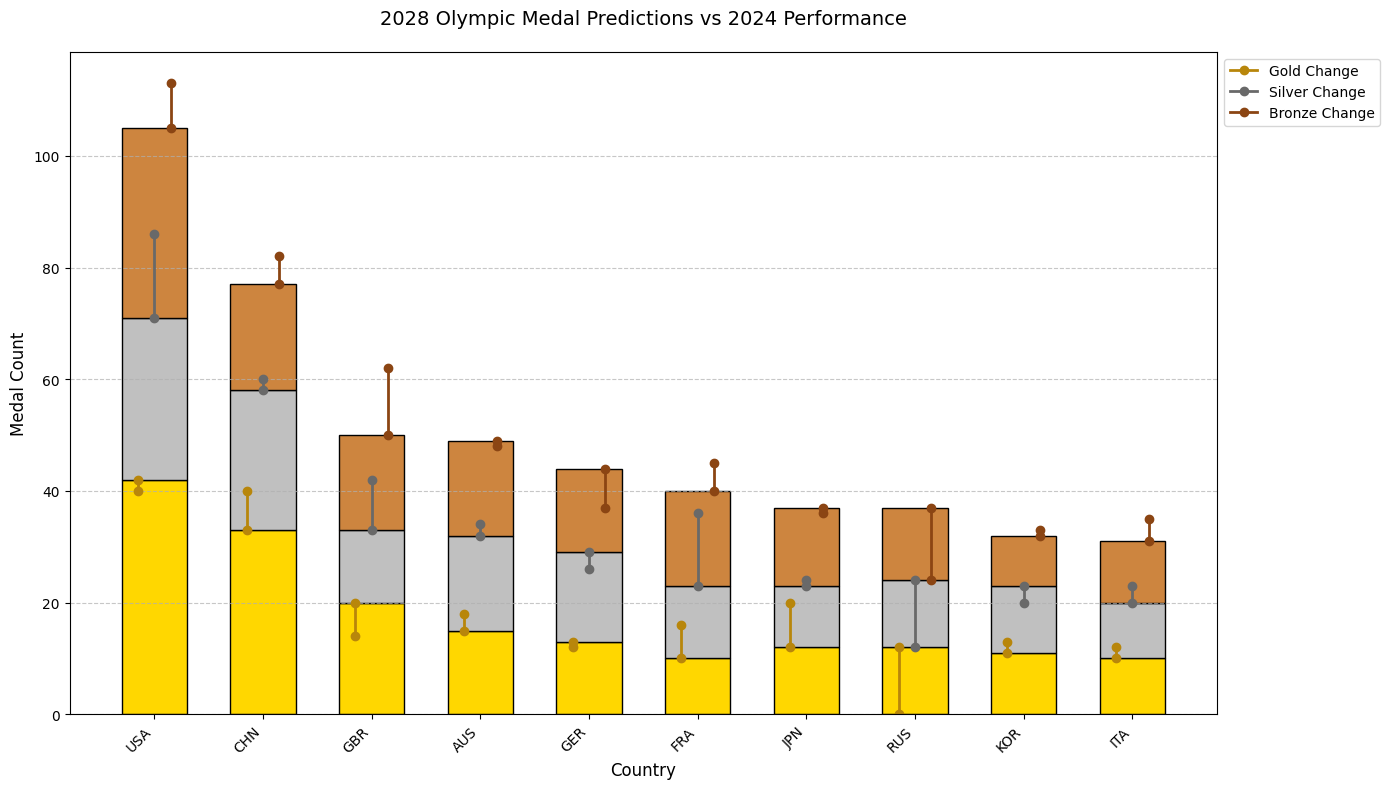

In [ ]:
plt.figure(figsize=(14, 8))

# 准备数据
top10 = results_df.nlargest(10, '2028_Total')
countries = top10['NOC'].values
x = np.arange(len(countries))  # 国家位置索引

# 获取2024年实际数据
gold_2024 = [all_data[(all_data['NOC']==noc) & (all_data['Year']==2024)]['Gold'].values[0] for noc in countries]
silver_2024 = [all_data[(all_data['NOC']==noc) & (all_data['Year']==2024)]['Silver'].values[0] for noc in countries]
bronze_2024 = [all_data[(all_data['NOC']==noc) & (all_data['Year']==2024)]['Bronze'].values[0] for noc in countries]

# 预测数据
gold_2028 = top10['2028_Gold'].values
silver_2028 = top10['2028_Silver'].values
bronze_2028 = top10['2028_Bronze'].values

# 绘制堆叠柱状图（2028年预测）
plt.bar(x, gold_2028, color='gold', edgecolor='black', label='Gold 2028', width=0.6)
plt.bar(x, silver_2028, bottom=gold_2028, color='silver', edgecolor='black', label='Silver 2028', width=0.6)
plt.bar(x, bronze_2028, bottom=gold_2028+silver_2028, color='peru', edgecolor='black', label='Bronze 2028', width=0.6)

# 添加变化量误差线（2028 vs 2024）
for i in range(len(countries)):
    # 金牌变化
    gold_diff = gold_2028[i] - gold_2024[i]
    plt.plot([i-0.15, i-0.15],
             [gold_2024[i], gold_2028[i]],
             color='darkgoldenrod', lw=2, marker='o', markersize=6)

    # 银牌变化（叠加在金牌基础上）
    silver_diff = silver_2028[i] - silver_2024[i]
    plt.plot([i, i],
             [gold_2028[i]+silver_2024[i], gold_2028[i]+silver_2028[i]],
             color='dimgray', lw=2, marker='o', markersize=6)

    # 铜牌变化（叠加在金银基础上）
    bronze_diff = bronze_2028[i] - bronze_2024[i]
    plt.plot([i+0.15, i+0.15],
             [gold_2028[i]+silver_2028[i]+bronze_2024[i],
              gold_2028[i]+silver_2028[i]+bronze_2028[i]],
             color='saddlebrown', lw=2, marker='o', markersize=6)

# # 添加参考线（2024年总奖牌数）
# total_2024 = [g+s+b for g,s,b in zip(gold_2024, silver_2024, bronze_2024)]
# plt.plot(x, total_2024, 'kx', markersize=10, label='2024 Total')

# 图表装饰
plt.title('2028 Olympic Medal Predictions vs 2024 Performance', fontsize=14, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Medal Count', fontsize=12)
plt.xticks(x, countries, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 自定义图例
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='darkgoldenrod', lw=2, marker='o', label='Gold Change'),
    Line2D([0], [0], color='dimgray', lw=2, marker='o', label='Silver Change'),
    Line2D([0], [0], color='saddlebrown', lw=2, marker='o', label='Bronze Change'),
    # Line2D([0], [0], color='black', marker='x', linestyle='None', label='2024 Total')
]
plt.legend(handles=legend_elements + plt.gca().get_legend_handles_labels()[0][3:],
           loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# 保存图表到本地文件
plt.savefig('2028_Olympic_Medal_Predictions_Top10.png', dpi=300)  # 指定文件路径和格式，dpi参数控制图像质量

plt.show()  # 显示图表


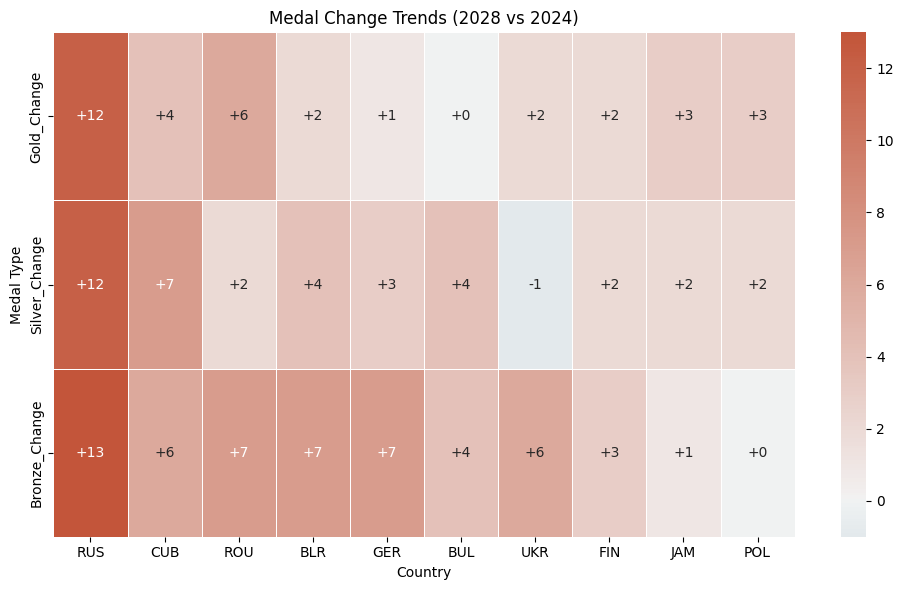

In [ ]:
top10_increase = results_df.nlargest(10, 'Total_Change')
change_df = top10_increase[['NOC','Gold_Change','Silver_Change','Bronze_Change']].set_index('NOC')

plt.figure(figsize=(10,6))
sns.heatmap(change_df.T,
           annot=True, fmt="+d",
           cmap=sns.diverging_palette(220, 20, as_cmap=True),
           center=0,
           linewidths=0.5)

plt.title('Medal Change Trends (2028 vs 2024)')
plt.ylabel('Medal Type')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

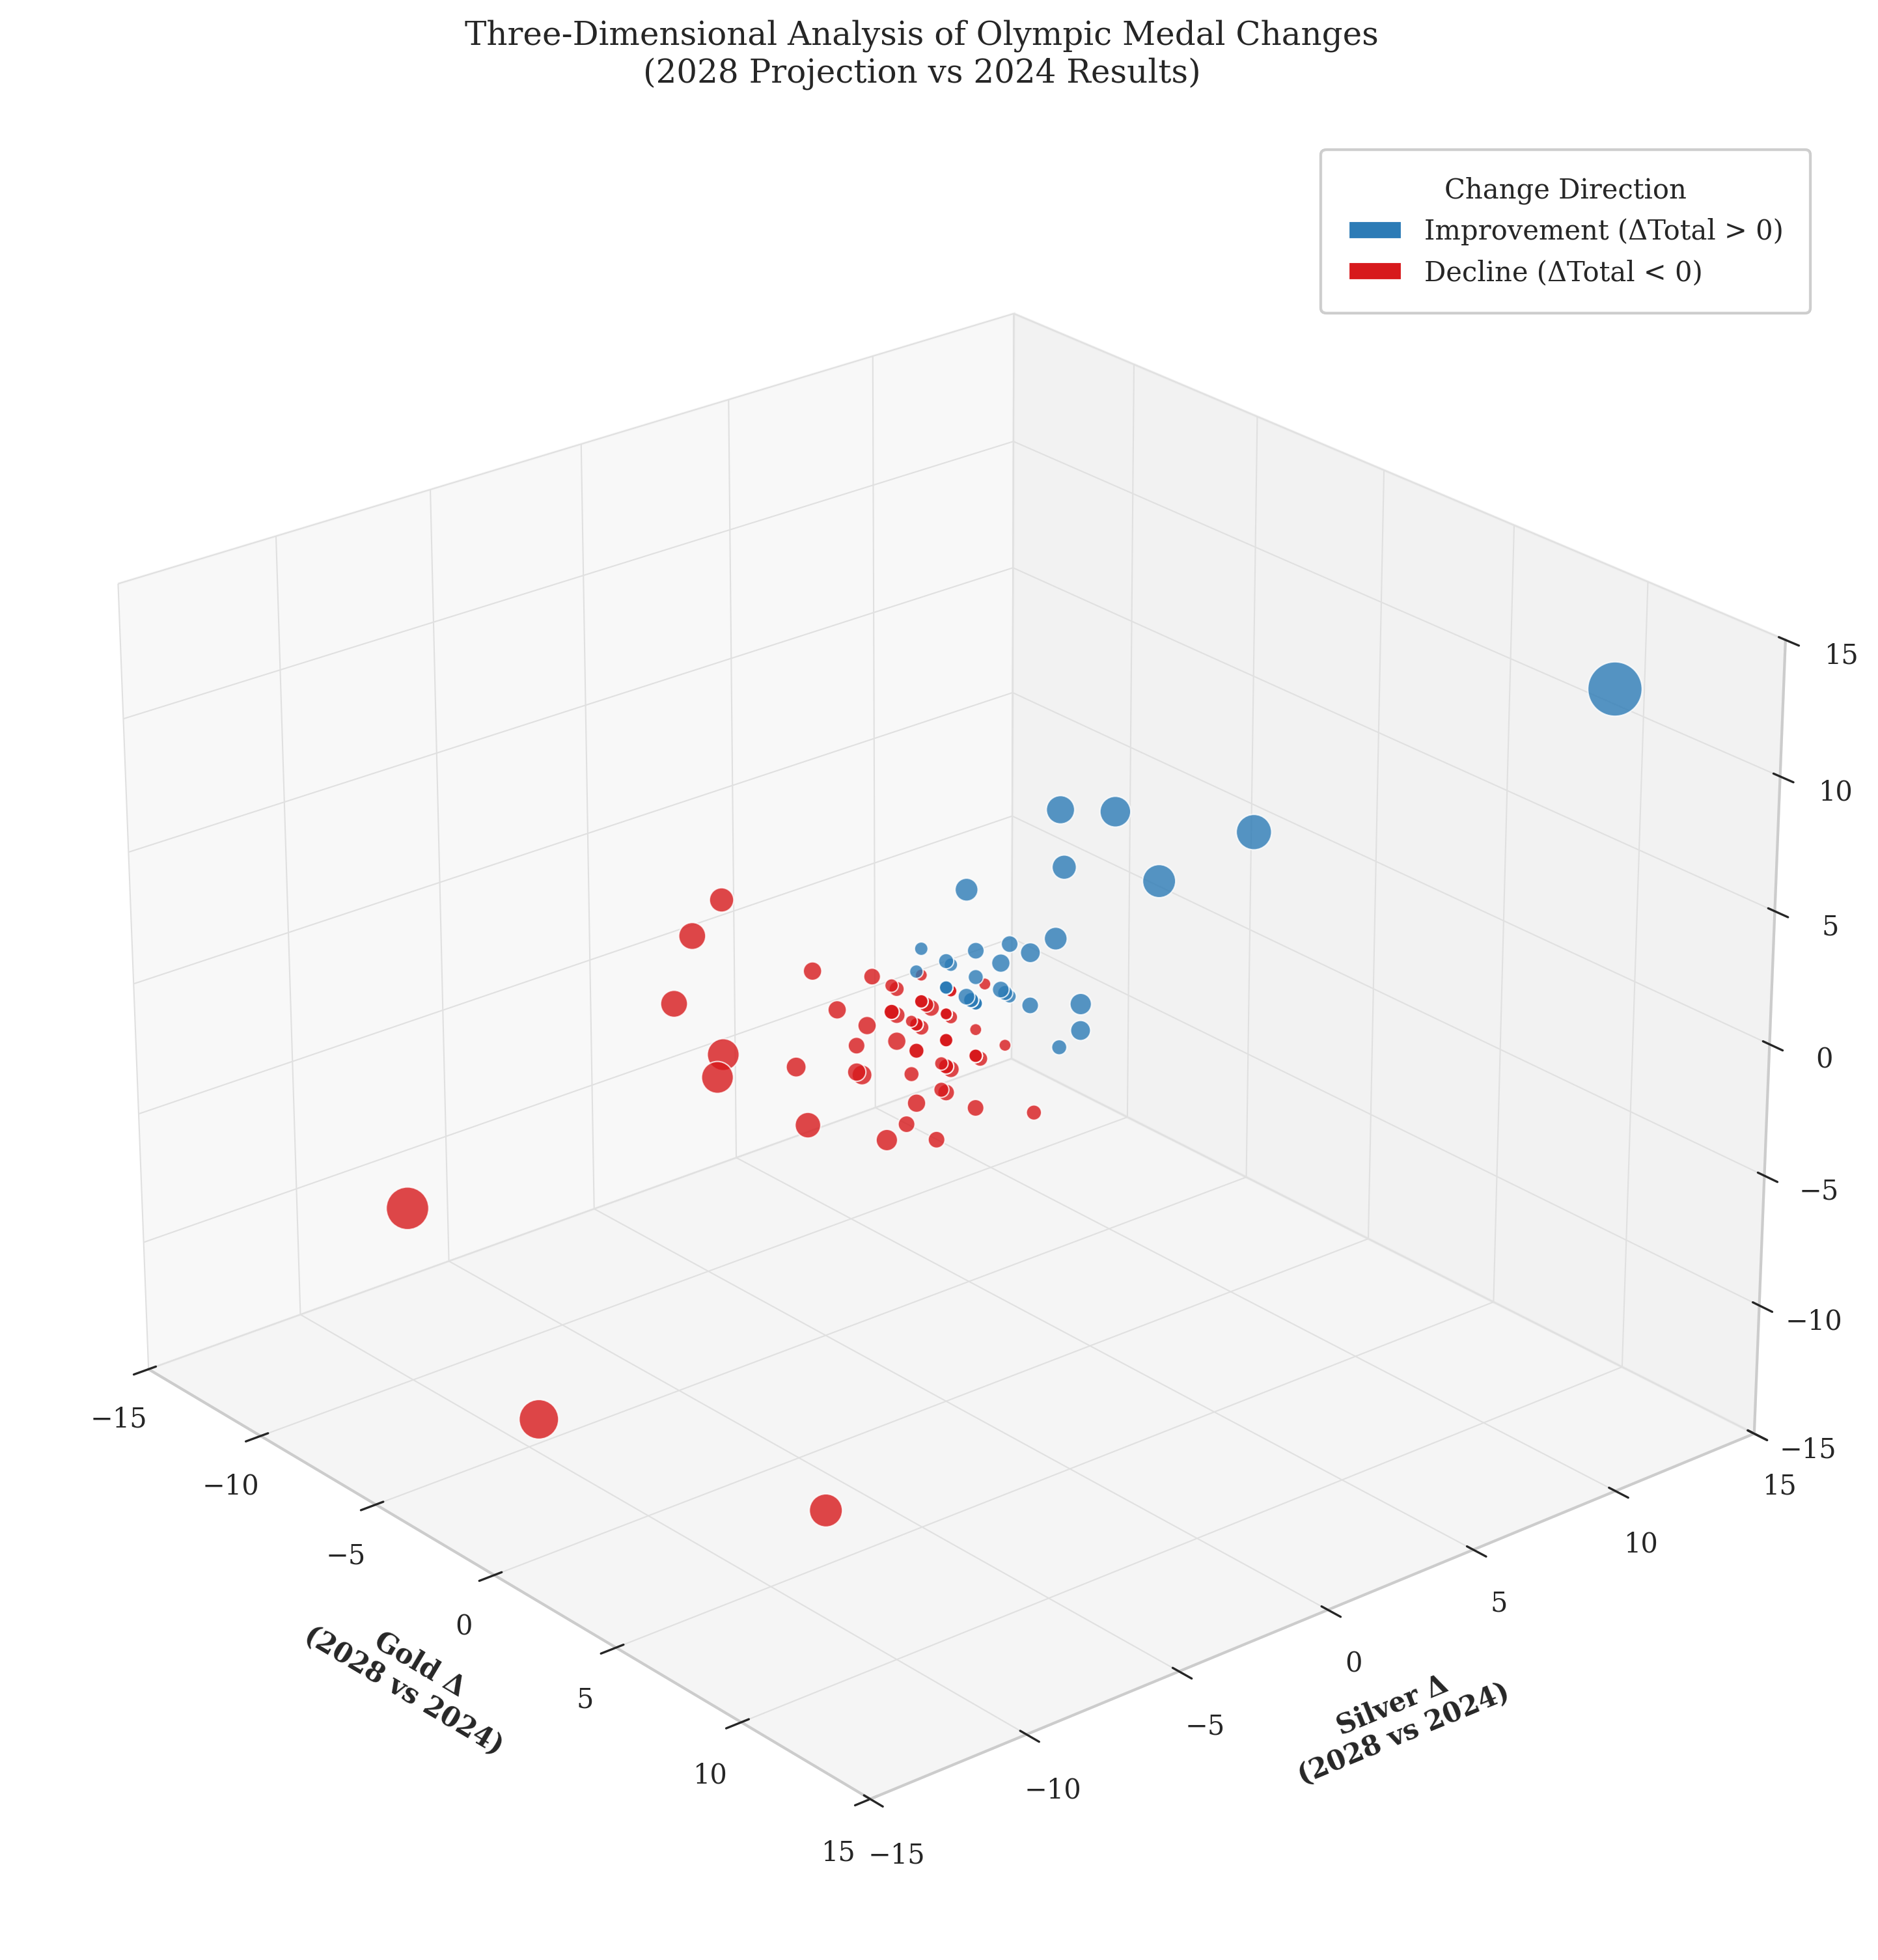

In [ ]:
# 设置学术论文规范样式
plt.rcParams.update({
    'font.family': 'serif',        # 使用衬线字体（学术论文常用）
    'font.size': 8,               # 基础字号
    'axes.titlesize': 10,          # 标题字号
    'axes.labelsize': 10,          # 坐标轴标签字号
    'xtick.labelsize': 10,         # X轴刻度字号
    'ytick.labelsize': 10,         # Y轴刻度字号
    'legend.fontsize': 10,         # 图例字号
    'figure.dpi': 300,             # 输出分辨率
    'savefig.bbox': 'tight',       # 保存时自动裁剪
    'savefig.pad_inches': 0.1      # 图片边距
})

# 创建画布（适应论文双栏排版）
fig = plt.figure(figsize=(16, 12))  # 黄金比例尺寸
ax = fig.add_subplot(111, projection='3d')

# ========== 数据可视化优化 ==========
# 定义学术配色方案
colors = np.where(results_df['Total_Change'] > 0,
                '#2c7bb6',  # 蓝色表示进步
                '#d7191c')  # 红色表示退步

# 优化气泡大小公式（更平缓的非线性缩放）
base_size = 20
sizes = base_size + np.abs(results_df['Total_Change'])**1.2 * 5

# 绘制3D气泡（增强深度感知）
scatter = ax.scatter(
    results_df['Gold_Change'],
    results_df['Silver_Change'],
    results_df['Bronze_Change'],
    s=sizes,
    c=colors,
    alpha=0.8,
    edgecolors='w',
    linewidths=0.5,
    depthshade=True
)

# ========== 智能标注系统 ==========
def smart_annotation(ax, df, threshold=10):
    """动态调整标注位置的智能标注算法"""
    from scipy.spatial import KDTree
    points = df[['Gold_Change','Silver_Change','Bronze_Change']].values
    kdtree = KDTree(points)
    annotated = set()

    # 按变化量排序优先标注大值
    sorted_df = df.sort_values('Total_Change', key=abs, ascending=False)

    for i, row in sorted_df.iterrows():
        if abs(row['Total_Change']) < threshold:
            continue

        # 计算最近邻距离
        dists, _ = kdtree.query(row[['Gold_Change','Silver_Change','Bronze_Change']], k=3)
        min_dist = np.min(dists)

        if min_dist > 5:  # 确保最小间距
            offset = (row['Gold_Change']*0.1,
                     row['Silver_Change']*0.1,
                     row['Bronze_Change']*0.1)

            ax.text(row['Gold_Change']+offset[0],
                   row['Silver_Change']+offset[1],
                   row['Bronze_Change']+offset[2],
                   row['NOC'],
                   fontsize=8,
                   color='#2d2d2d',
                   ha='center',
                   va='center',
                   bbox=dict(boxstyle="round,pad=0.2",
                            facecolor='white',
                            edgecolor='#cccccc',
                            alpha=0.9))
            annotated.add(i)
            kdtree = KDTree(points)  # 更新KDTree

smart_annotation(ax, results_df, threshold=10)

# ========== 坐标系统优化 ==========
# 对称坐标范围（增强可比性）
max_val = max(results_df[['Gold_Change','Silver_Change','Bronze_Change']].abs().max().max(), 15)
ax.set(xlim=(-max_val, max_val),
       ylim=(-max_val, max_val),
       zlim=(-max_val, max_val))

# 优化坐标轴标签
ax.set_xlabel('Gold Δ\n(2028 vs 2024)',
             labelpad=10,
             fontweight='semibold')
ax.set_ylabel('Silver Δ\n(2028 vs 2024)',
             labelpad=10,
             fontweight='semibold')
ax.set_zlabel('Bronze Δ\n(2028 vs 2024)',
             labelpad=10,
             fontweight='semibold')

# 设置专业网格线
ax.xaxis._axinfo["grid"].update({"linewidth":0.5, "color" : "#e0e0e0"})
ax.yaxis._axinfo["grid"].update({"linewidth":0.5, "color" : "#e0e0e0"})
ax.zaxis._axinfo["grid"].update({"linewidth":0.5, "color" : "#e0e0e0"})

# ========== 图例系统优化 ==========
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# 颜色图例
color_legend = [
    Patch(facecolor='#2c7bb6', edgecolor='w', label='Improvement (ΔTotal > 0)'),
    Patch(facecolor='#d7191c', edgecolor='w', label='Decline (ΔTotal < 0)')
]

# 大小图例（示例值）
size_values = [5, 10, 15]
size_legend = [
    Line2D([0], [0],
           marker='o',
           markersize=np.sqrt(base_size + v**1.2*5)/2,
           markerfacecolor='#636363',
           label=f'ΔTotal={v}',
           linestyle='none') for v in size_values
]

# 创建组合图例
leg1 = ax.legend(handles=color_legend,
                loc='upper right',
                frameon=True,
                framealpha=0.9,
                borderpad=1,
                title="Change Direction",
                title_fontsize=10)

# leg2 = ax.legend(handles=size_legend,
#                 loc='lower right',
#                 frameon=True,
#                 framealpha=0.9,
#                 borderpad=1,
#                 title="Bubble Size",
#                 title_fontsize=10)

ax.add_artist(leg1)

# ========== 标题与注释 ==========
plt.title("Three-Dimensional Analysis of Olympic Medal Changes\n(2028 Projection vs 2024 Results)",
         fontsize=12,
         pad=20)

# 添加数据来源说明
# plt.figtext(0.5, 0.01,
#            "Data Source: International Olympic Committee (IOC) Historical Records\n"
#            "Note: Bubble size indicates magnitude of total medal change (∝|ΔTotal|^1.2)",
#            ha='center',
#            fontsize=9,
#            color='#666666')

# ========== 视角优化 ==========
ax.view_init(elev=25, azim=-40)  # 最佳学术展示视角

# 输出高质量图片
plt.savefig('medal_analysis_3d.pdf', bbox_inches='tight')  # 矢量图格式
plt.show()

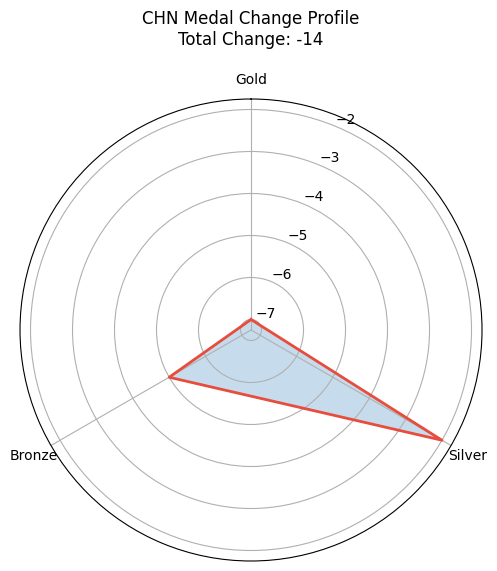

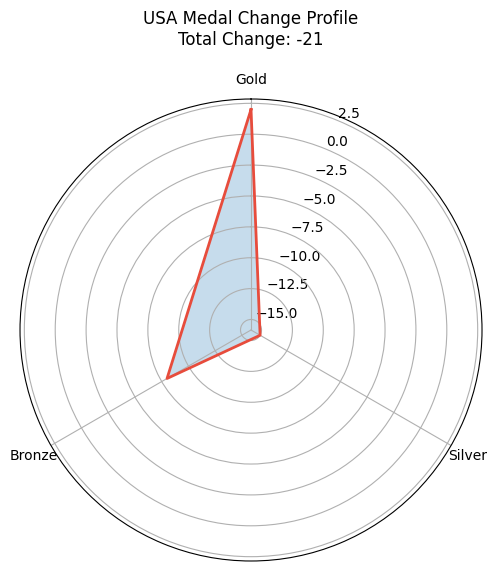

In [ ]:
def plot_radar_chart(noc):
    data = results_df[results_df['NOC']==noc].iloc[0]
    categories = ['Gold_Change', 'Silver_Change', 'Bronze_Change']
    values = data[categories].values
    labels = ['Gold', 'Silver', 'Bronze']

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    values = np.concatenate((values,[values[0]]))
    angles += angles[:1]

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, values, color='#2ecc71' if data['Total_Change']>0 else '#e74c3c', linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)

    plt.title(f'{noc} Medal Change Profile\nTotal Change: {data["Total_Change"]:+d}', y=1.1)
    plt.show()

# 示例：中美对比
plot_radar_chart('CHN')
plot_radar_chart('USA')

In [ ]:
# 计算进步/退步的统计显著性
from scipy import stats
improve_scores = results_df[results_df['Total_Change']>0]['Total_Change']
decline_scores = results_df[results_df['Total_Change']<0]['Total_Change'].abs()

t_stat, p_value = stats.ttest_ind(improve_scores, decline_scores)
print(f"Improvement vs Decline t-test: t={t_stat:.2f}, p={p_value:.4f}")

Improvement vs Decline t-test: t=0.58, p=0.5623


## 预测未获得过奖牌的国家下届奥运会获得奖牌的概率

In [ ]:
import pandas as pd

unique_years = medal_counts['Year'].unique()

have_got_country = set()

# 遍历每个 Year
for year in unique_years:
    # 筛选出当前 Year 的数据
    year_data = medal_counts[medal_counts['Year'] == year]

    existing_nocs = year_data['NOC'].unique()

    for country, noc in noc_dict.items():
        if noc in existing_nocs:
            have_got_country.add(noc)

have_not_got_country = set(noc_dict.values()) - have_got_country

print(len(have_not_got_country))


66


### 没获得过奖牌的国家

In [ ]:
have_not_got_country

{'AND',
 'ANG',
 'ANT',
 'ARU',
 'ASA',
 'BAN',
 'BEN',
 'BHU',
 'BIH',
 'BIZ',
 'BOL',
 'BRU',
 'CAF',
 'CAM',
 'CAY',
 'CGO',
 'CHA',
 'COD',
 'COK',
 'COM',
 'CPV',
 'ESA',
 'FSM',
 'GAM',
 'GBS',
 'GEQ',
 'GUI',
 'GUM',
 'HON',
 'IVB',
 'KIR',
 'LAO',
 'LBA',
 'LBR',
 'LES',
 'LIE',
 'MAD',
 'MAW',
 'MDV',
 'MHL',
 'MLI',
 'MLT',
 'MON',
 'MTN',
 'MYA',
 'NCA',
 'NEP',
 'NRU',
 'OMA',
 'PLE',
 'PLW',
 'PNG',
 'RWA',
 'SEY',
 'SKN',
 'SLE',
 'SOL',
 'SOM',
 'SSD',
 'STP',
 'SWZ',
 'TLS',
 'TUV',
 'VAN',
 'VIN',
 'YEM'}

### atheltes表处理

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 假设原始数据框名为athletes（根据你的变量名调整）
athletes = pd.read_csv('summerOly_athletes.csv')

# 标记是否获奖
athletes['HasMedal'] = athletes['Medal'] != 'No medal'

# ========== 新增：性别比例计算 ==========
# 将性别转换为数值型（M=0, F=1）
athletes['Sex'] = athletes['Sex'].map({'M': 0, 'F': 1})

# 按国家-年份计算性别比例
gender_ratio = athletes.groupby(['NOC', 'Year']).agg(
    FemaleCount=('Sex', 'sum'),      # 女性运动员总数（因F=1，sum即为女性数量）
    TotalAthletes=('Name', 'nunique') # 总运动员数（去重后的姓名数量）
).reset_index()

# 计算女性比例（避免除零错误）
gender_ratio['SexRatio'] = gender_ratio['FemaleCount'] / (gender_ratio['TotalAthletes'] + 1e-6)  # +1e-6防止分母为0

# ========== 原始特征聚合 ==========
# 按国家-年份分组生成特征
country_year = athletes.groupby(['NOC', 'Year']).agg(
    AthleteCount=('Name', 'nunique'),
    SportCount=('Sport', 'nunique'),   # 如果需要删除此特征，移除这行
    EventCount=('Event', 'nunique'),
    HasMedal=('HasMedal', 'any')
).reset_index()

# ========== 合并性别比例 ==========
country_year = pd.merge(
    country_year,
    gender_ratio[['NOC', 'Year', 'SexRatio']],  # 只保留需要的列
    on=['NOC', 'Year'],
    how='left'
)

# ========== 生成标签 ==========
# 按国家排序后生成下一届获奖标签
country_year = country_year.sort_values(['NOC', 'Year'])
country_year['NextHasMedal'] = country_year.groupby('NOC')['HasMedal'].shift(-1)
country_year = country_year.dropna(subset=['NextHasMedal'])  # 删除没有下一届数据的行
country_year['NextHasMedal'] = country_year['NextHasMedal'].astype(int)  # 转换为整型
country_year.head()

,NOC,Year,AthleteCount,SportCount,EventCount,HasMedal,SexRatio,NextHasMedal
0,AFG,1936,15,2,4,False,0.0,0
1,AFG,1948,22,2,2,False,0.0,0
2,AFG,1956,12,1,1,False,0.0,0
3,AFG,1960,12,2,13,False,0.0,0
4,AFG,1964,8,1,8,False,0.0,0


In [ ]:
country_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2988 entries, 0 to 3220
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NOC           2988 non-null   object 
 1   Year          2988 non-null   int64  
 2   AthleteCount  2988 non-null   int64  
 3   SportCount    2988 non-null   int64  
 4   EventCount    2988 non-null   int64  
 5   HasMedal      2988 non-null   bool   
 6   SexRatio      2988 non-null   float64
 7   NextHasMedal  2988 non-null   int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 189.7+ KB


### 预测2028年特征数据

In [ ]:
def predict_2028_features(noc_data, target_col='AthleteCount'):
    """使用线性回归预测2028年特征值"""
    if len(noc_data) < 2:  # 数据不足时返回最近值
        return noc_data[target_col].iloc[-1]

    X = noc_data[['Year']].values
    y = noc_data[target_col].values
    model = LinearRegression()
    model.fit(X, y)
    return model.predict([[2028]])[0]

# 对每个国家预测2028年的特征
features_to_predict = ['AthleteCount', 'SportCount', 'EventCount', 'SexRatio']
future_features = []

for noc in country_year['NOC'].unique():
    noc_data = country_year[country_year['NOC'] == noc]
    preds = {'NOC': noc, 'Year': 2028}
    for feature in features_to_predict:
        preds[feature] = predict_2028_features(noc_data, feature)
    future_features.append(preds)

future_2028 = pd.DataFrame(future_features)

### 训练预测未获奖国家获奖概率模型

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, roc_auc_score
)

# 生成标签：下一届是否获奖
country_year = country_year.sort_values(['NOC', 'Year'])
country_year['NextHasMedal'] = country_year.groupby('NOC')['HasMedal'].shift(-1)

# 清洗数据：删除缺失标签的行
country_year = country_year.dropna(subset=['NextHasMedal'])

# 确保标签为整数 0/1
country_year['NextHasMedal'] = country_year['NextHasMedal'].astype(int)

# 检查标签分布
print("标签值分布:\n", country_year['NextHasMedal'].value_counts())
print("标签数据类型:", country_year['NextHasMedal'].dtype)

# 划分训练集和测试集（按时间）
# 确保测试集时间段内有数据（例如调整为 Year >= 2008）
train = country_year[country_year['Year'] < 2008]
test = country_year[country_year['Year'] >= 2008]

# 检查数据集大小
print("\n训练集样本数:", len(train))
print("测试集样本数:", len(test))

# 如果测试集为空，抛出错误提示
if len(test) == 0:
    raise ValueError("测试集为空，请调整时间划分阈值或检查数据预处理逻辑！")

# 确保特征列和标签列存在
features_to_predict = ['AthleteCount', 'SportCount', 'EventCount', 'SexRatio']
X_train = train[features_to_predict]
y_train = train['NextHasMedal']
X_test = test[features_to_predict]
y_test = test['NextHasMedal']

# 训练模型
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# 评估模型
y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)

# 计算指标
auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 打印结果
print("\n分类模型评估结果:")
print("="*50)
print(f"AUC         : {auc:.2f}")
print(f"准确率      : {accuracy:.2f}")
print(f"精确率      : {precision:.2f}")
print(f"召回率      : {recall:.2f}")
print(f"F1分数      : {f1:.2f}")
print("\n混淆矩阵:")
print(cm)
print("\n分类报告:")
print(classification_report(y_test, y_pred))

标签值分布:
 NextHasMedal
0    1469
1    1298
Name: count, dtype: int64
标签数据类型: int64

训练集样本数: 2161
测试集样本数: 606

分类模型评估结果:
AUC         : 0.92
准确率      : 0.86
精确率      : 0.87
召回率      : 0.80
F1分数      : 0.83

混淆矩阵:
[[316  31]
 [ 52 207]]

分类报告:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       347
           1       0.87      0.80      0.83       259

    accuracy                           0.86       606
   macro avg       0.86      0.85      0.86       606
weighted avg       0.86      0.86      0.86       606



### 使用预测的2028年特征数据和训练得到的模型预测2028年未获奖国家获奖概率

In [ ]:
# 筛选这些国家的2028年预测特征
future_2028_target = future_2028[future_2028['NOC'].isin(have_not_got_country)]

# 预测概率
if not future_2028_target.empty:
    X_2028 = future_2028_target[features_to_predict]
    future_2028_target['PredictedProbability'] = clf.predict_proba(X_2028)[:, 1]
    future_2028_target[['NOC', 'PredictedProbability']].to_csv('2028_final_predictions.csv', index=False)
    print(future_2028_target[['NOC', 'PredictedProbability']])
else:
    print("目标国家无预测数据")

     NOC  PredictedProbability
4    AND              0.011766
5    ANG              0.131553
6    ANT              0.181313
10   ARU              0.035049
11   ASA              0.047360
..   ...                   ...
197  TLS              0.016390
203  TUV              0.210111
211  VAN              0.128461
214  VIN              0.215568
217  YEM              0.105577

[66 rows x 2 columns]


<ipython-input-64-a81cfcc4c1dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_2028_target['PredictedProbability'] = clf.predict_proba(X_2028)[:, 1]


### 可视化

In [ ]:
prediction = pd.read_csv('2028_final_predictions.csv')

In [ ]:
import plotly.express as px

fig = px.choropleth(prediction, locations='NOC', color='PredictedProbability',
                    hover_name='NOC', title='Probability of a medal in 2028 for a country that has never won a medal',
                    color_continuous_scale=px.colors.sequential.Viridis,
                    template="plotly_white")
fig.show()

<ipython-input-15-42686f778069>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




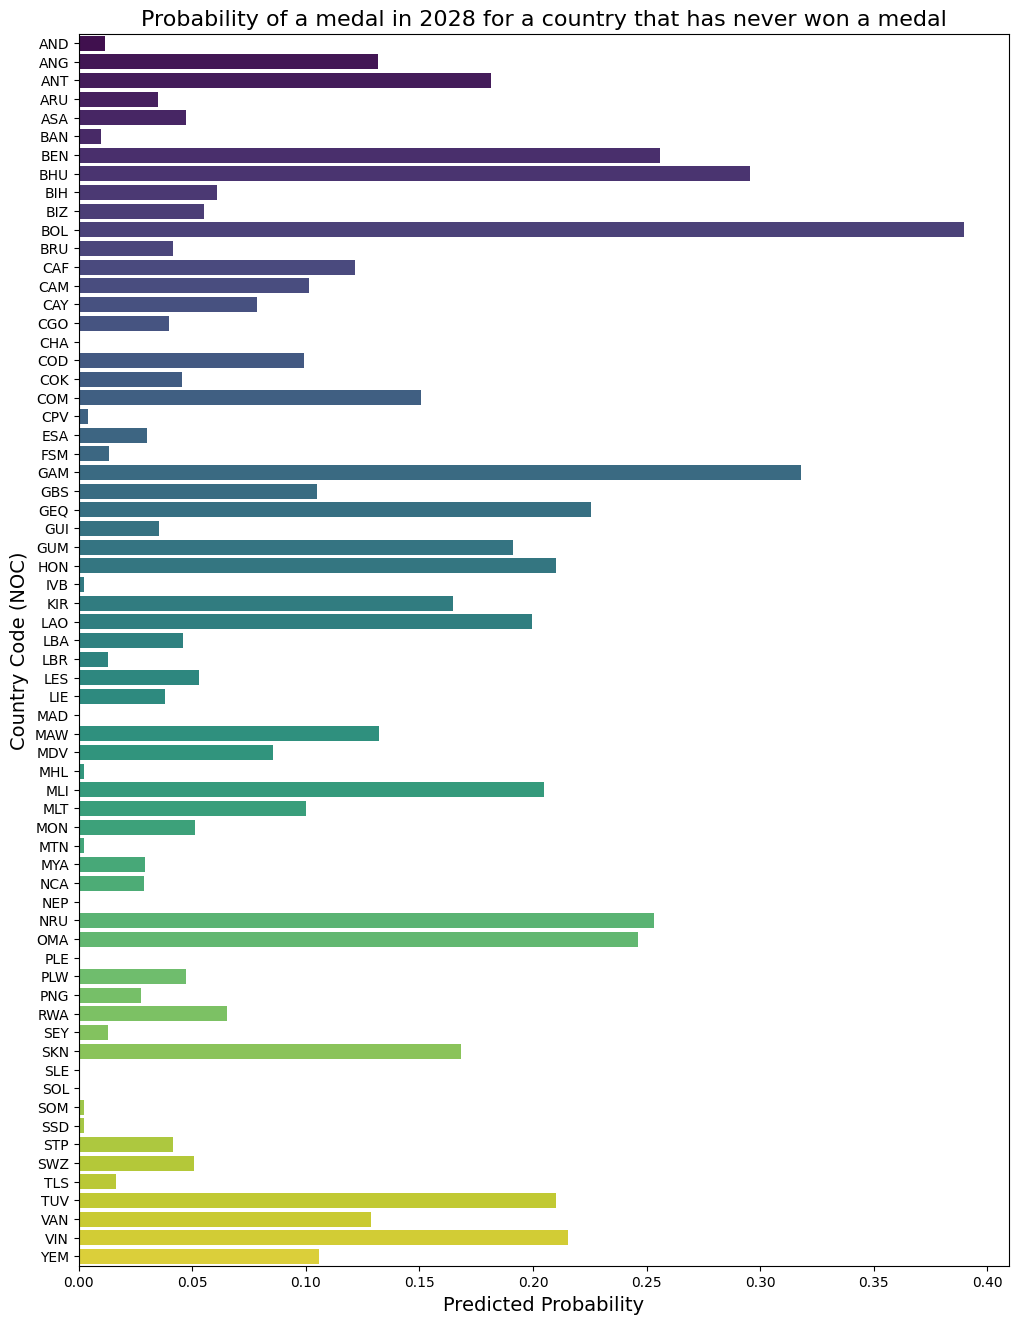

In [ ]:
plt.figure(figsize=(12, 16))
sns.barplot(x='PredictedProbability', y='NOC', data=prediction, palette='viridis')
plt.title('Probability of a medal in 2028 for a country that has never won a medal', fontsize=16)
plt.xlabel('Predicted Probability', fontsize=14)
plt.ylabel('Country Code (NOC)', fontsize=14)
plt.show()

In [ ]:
fig = px.scatter(prediction,
                 x='NOC',
                 y='PredictedProbability',
                 size='PredictedProbability',
                 color='PredictedProbability',
                 hover_name='NOC',
                 hover_data={'PredictedProbability': ':.2f'},  # 悬停时显示概率，保留两位小数
                 title='Probability of a medal in 2028 for a country that has never won a medal',
                 labels={'PredictedProbability': 'Probability', 'NOC': 'Country Code'},
                 size_max=50,
                 color_continuous_scale=px.colors.sequential.Plasma)  # 使用 Plasma 颜色方案

# 调整布局
fig.update_layout(
    xaxis_title='Country Code (NOC)',  # x 轴标题
    yaxis_title='Predicted Probability',  # y 轴标题
    xaxis_tickangle=-45,  # 旋转 x 轴标签
    showlegend=False  # 隐藏图例
)

fig.show()

## 好教练效应


In [ ]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Name      252565 non-null  object
 1   Sex       252565 non-null  int64 
 2   Team      252565 non-null  object
 3   NOC       252565 non-null  object
 4   Year      252565 non-null  int64 
 5   City      252565 non-null  object
 6   Sport     252565 non-null  object
 7   Event     252565 non-null  object
 8   Medal     252565 non-null  object
 9   HasMedal  252565 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 17.6+ MB


In [ ]:
gold_medals = athletes[athletes['Medal'] == 'Gold']
gold_medals = gold_medals.sort_values(by=['NOC', 'Event', 'Year'])
gold_medals.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal,HasMedal
247174,Ivan Litvinovich,1,AIN,AIN,2024,Paris,Trampoline Gymnastics,Men,Gold,True
134219,Noureddine Morceli,1,Algeria,ALG,1996,Atlanta,Athletics,"Athletics Men's 1,500 metres",Gold,True
120744,Taoufik Makhloufi,1,Algeria,ALG,2012,London,Athletics,"Athletics Men's 1,500 metres",Gold,True
22561,Hassiba Boulmerka,0,Algeria,ALG,1992,Barcelona,Athletics,"Athletics Women's 1,500 metres",Gold,True
129015,Nouria Mrah-benida,0,Algeria,ALG,2000,Sydney,Athletics,"Athletics Women's 1,500 metres",Gold,True


In [ ]:
gold_medals['prev_year'] = gold_medals.groupby(['NOC', 'Event'])['Year'].shift(1)
gold_medals['Consecutive_Gold'] = (gold_medals['Year'] - gold_medals['prev_year'] == 4).astype(int)
consecutive_gold_3_or_more = gold_medals.groupby(['NOC', 'Event']).filter(lambda x: len(x) >= 3 and x['Consecutive_Gold'].sum() == len(x) - 1)
consecutive_gold_3_or_more.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal,HasMedal,prev_year,Consecutive_Gold
68013,Gong Zhichao,0,China,CHN,2000,Sydney,Badminton,Badminton Women's Singles,Gold,True,NaN,0
220880,Zhang Ning,0,China,CHN,2004,Athina,Badminton,Badminton Women's Singles,Gold,True,2000.0,1
220881,Zhang Ning,0,China,CHN,2008,Beijing,Badminton,Badminton Women's Singles,Gold,True,2004.0,1
113566,Li Xuerui,0,China,CHN,2012,London,Badminton,Badminton Women's Singles,Gold,True,2008.0,1
63139,Gao Min,0,China,CHN,1988,Seoul,Diving,Diving Women's Springboard,Gold,True,NaN,0


In [ ]:
no_medal_next_year = gold_medals.copy()
no_medal_next_year['Next_Year_Medal'] = gold_medals.groupby(['NOC', 'Event'])['Medal'].shift(-1)
no_medal_next_year_no_medal = no_medal_next_year[no_medal_next_year['Next_Year_Medal'] != 'Gold']
no_medal_next_year_no_medal.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal,HasMedal,prev_year,Consecutive_Gold,Next_Year_Medal
247174,Ivan Litvinovich,1,AIN,AIN,2024,Paris,Trampoline Gymnastics,Men,Gold,True,NaN,0,NaN
120744,Taoufik Makhloufi,1,Algeria,ALG,2012,London,Athletics,"Athletics Men's 1,500 metres",Gold,True,1996.0,0,NaN
129015,Nouria Mrah-benida,0,Algeria,ALG,2000,Sydney,Athletics,"Athletics Women's 1,500 metres",Gold,True,1992.0,0,NaN
184733,Hocine Soltani,1,Algeria,ALG,1996,Atlanta,Boxing,Boxing Men's Lightweight,Gold,True,NaN,0,NaN
238188,Imane Khelif,0,Algeria,ALG,2024,Paris,Boxing,Women's 66kg,Gold,True,NaN,0,NaN


In [ ]:
consecutive_gold_3_or_more.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 68013 to 194602
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              160 non-null    object 
 1   Sex               160 non-null    int64  
 2   Team              160 non-null    object 
 3   NOC               160 non-null    object 
 4   Year              160 non-null    int64  
 5   City              160 non-null    object 
 6   Sport             160 non-null    object 
 7   Event             160 non-null    object 
 8   Medal             160 non-null    object 
 9   HasMedal          160 non-null    bool   
 10  prev_year         116 non-null    float64
 11  Consecutive_Gold  160 non-null    int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 15.2+ KB


In [ ]:
no_medal_next_year_no_medal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3403 entries, 247174 to 38318
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              3403 non-null   object 
 1   Sex               3403 non-null   int64  
 2   Team              3403 non-null   object 
 3   NOC               3403 non-null   object 
 4   Year              3403 non-null   int64  
 5   City              3403 non-null   object 
 6   Sport             3403 non-null   object 
 7   Event             3403 non-null   object 
 8   Medal             3403 non-null   object 
 9   HasMedal          3403 non-null   bool   
 10  prev_year         1671 non-null   float64
 11  Consecutive_Gold  3403 non-null   int64  
 12  Next_Year_Medal   0 non-null      object 
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 478.0+ KB


In [ ]:
consecutive_gold_3_or_more.to_csv('consecutive_gold_3_or_more.csv', index=False)
no_medal_next_year_no_medal.to_csv('no_medal_next_year_no_medal.csv', index=False)

In [ ]:
consecutive_gold_3_or_more_noc_event = consecutive_gold_3_or_more[['NOC', 'Event']].drop_duplicates()
no_medal_next_year_no_medal_noc_event = no_medal_next_year_no_medal[['NOC', 'Event']].drop_duplicates()
print(consecutive_gold_3_or_more_noc_event)


        NOC                                            Event
68013   CHN                        Badminton Women's Singles
63139   CHN                       Diving Women's Springboard
32919   CHN                     Table Tennis Women's Singles
33076   CHN                Weightlifting Women's Lightweight
116788  CUB   Wrestling Men's Super-Heavyweight, Greco-Roman
53084   DEN                  Sailing Mixed One Person Dinghy
44162   ETH                   Athletics Women's 5,000 metres
165494  FIN        Athletics Men's 3,000 metres Steeplechase
94030   FIN                       Rowing Men's Single Sculls
124058  FRA        Cycling Men's Mountainbike, Cross-Country
82402   GBR                             Cycling Men's Keirin
152515  GBR                  Sailing Men's One Person Dinghy
187324  GDR                     Athletics Women's 200 metres
167688  GER  Equestrianism Mixed Three-Day Event, Individual
46867   GRE            Weightlifting Men's Light-Heavyweight
41389   HUN      Swimmin

In [ ]:
print(no_medal_next_year_no_medal_noc_event)

        NOC                                      Event
247174  AIN                                        Men
120744  ALG               Athletics Men's 1,500 metres
129015  ALG             Athletics Women's 1,500 metres
184733  ALG                   Boxing Men's Lightweight
238188  ALG                               Women's 66kg
...     ...                                        ...
200140  YUG       Wrestling Men's Flyweight, Freestyle
115141  YUG   Wrestling Men's Lightweight, Greco-Roman
153915  YUG  Wrestling Men's Middleweight, Greco-Roman
211457  ZIM                      Hockey Women's Hockey
38318   ZIM     Swimming Women's 200 metres Backstroke

[3403 rows x 2 columns]
